<a href="https://colab.research.google.com/github/shila121/projects/blob/main/Churn_prediction_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Framing the problem statement
Develop a predictive model to identify customers who are likely to churn within the next few months

# 2. Here, we try to analyse the data using various steps mentioned below:
-Hypothesis Testing

-EDA(univariate/Bi-variate analysis)

-Missing data analysis

-Numerical data analysis

-Outliers analysis

-Categorical data analysis

In [1]:
#1. Hypothesis Testing
# Null Hypothesis: there is no relationship between independent variable and target
# Alternate Hypothesis : there is significant relationship between independent and dependent variable

# 1. Hypothesis Testing

In [4]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

data =  pd.read_csv('HR-Employee-Attrition.csv')

print(data.head())
print(data.columns,len(data.columns),data.shape)
print()
# categorical columns
catCols =  data.select_dtypes('object').columns
print('categorical columns of data:',catCols,len(catCols))

# numerical columns
numCols = data.select_dtypes('number').columns
print('numeric columns of data:',numCols,len(numCols))

# print(data['Attrition'])

# change Attrition column to numerical value
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Attrition'] = le.fit_transform(data['Attrition'])
print(data['Attrition'].unique())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

# check the data imbalance

In [5]:
data['Attrition'].value_counts()


0    1233
1     237
Name: Attrition, dtype: int64

In [6]:
237/1233

0.1922141119221411

In [7]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [9]:
# we will carry out z-test to know the impact of numerical column
from statsmodels.stats import weightstats as stests

significant_numCols ,in_signifiacnt_numCols = [],[]

for i in numCols:
  if i != 'Attrition':
    p_val = stests.ztest(data[i],data.Attrition)
    p_val = p_val[1]
    print('columns:',i,"p_val:",p_val)
    if p_val < 0.05:
      status = 'Reject Null Hypothesis,Significant predictor'
      significant_numCols.append(i)
      print(status)
      print('----------------------------------------------')
    else:
      status = 'Accept Null Hypothesis,Insignificant predictors'
      in_signifiacnt_numCols.append(i)
      print(status)
      print('-------------------------------------------------')

print('significant numerical columns :',significant_numCols,len(significant_numCols))
print('in-significant numerical columns:',in_signifiacnt_numCols,len(in_signifiacnt_numCols))

columns: Age p_val: 0.0
Reject Null Hypothesis,Significant predictor
----------------------------------------------
columns: DailyRate p_val: 0.0
Reject Null Hypothesis,Significant predictor
----------------------------------------------
columns: DistanceFromHome p_val: 0.0
Reject Null Hypothesis,Significant predictor
----------------------------------------------
columns: Education p_val: 0.0
Reject Null Hypothesis,Significant predictor
----------------------------------------------
columns: EmployeeCount p_val: 0.0
Reject Null Hypothesis,Significant predictor
----------------------------------------------
columns: EmployeeNumber p_val: 0.0
Reject Null Hypothesis,Significant predictor
----------------------------------------------
columns: EnvironmentSatisfaction p_val: 0.0
Reject Null Hypothesis,Significant predictor
----------------------------------------------
columns: HourlyRate p_val: 0.0
Reject Null Hypothesis,Significant predictor
----------------------------------------------

In [10]:
# we will carry out chi-square test on the categorical columns to know their impact

from scipy.stats import chi2_contingency

significant_catCols,in_significant_catCols = [],[]

for i in catCols:
  if i != 'Attrition':
    stat,p_val,dof,ex = chi2_contingency(pd.crosstab(data[i],data.Attrition))
    print('columns:',i,"p_val:",p_val)
    if p_val < 0.05:
      status = 'Reject Null Hypothesis,Significant predictor'
      significant_catCols.append(i)
      print(status)
      print('----------------------------------------------')
    else:
      status = 'Accept Null Hypothesis,Insignificant predictors'
      in_significant_catCols.append(i)
      print(status)
      print('-------------------------------------------------')

print('significant categorical columns :',significant_catCols,len(significant_catCols))
print('in-significant categorical columns:',in_significant_catCols,len(in_significant_catCols))

columns: BusinessTravel p_val: 5.608614476449931e-06
Reject Null Hypothesis,Significant predictor
----------------------------------------------
columns: Department p_val: 0.004525606574479633
Reject Null Hypothesis,Significant predictor
----------------------------------------------
columns: EducationField p_val: 0.006773980139025212
Reject Null Hypothesis,Significant predictor
----------------------------------------------
columns: Gender p_val: 0.29057244902890855
Accept Null Hypothesis,Insignificant predictors
-------------------------------------------------
columns: JobRole p_val: 2.752481638050657e-15
Reject Null Hypothesis,Significant predictor
----------------------------------------------
columns: MaritalStatus p_val: 9.45551106034083e-11
Reject Null Hypothesis,Significant predictor
----------------------------------------------
columns: Over18 p_val: 1.0
Accept Null Hypothesis,Insignificant predictors
-------------------------------------------------
columns: OverTime p_val:

# 2. EDA(univariate/Bi-variate analysis)

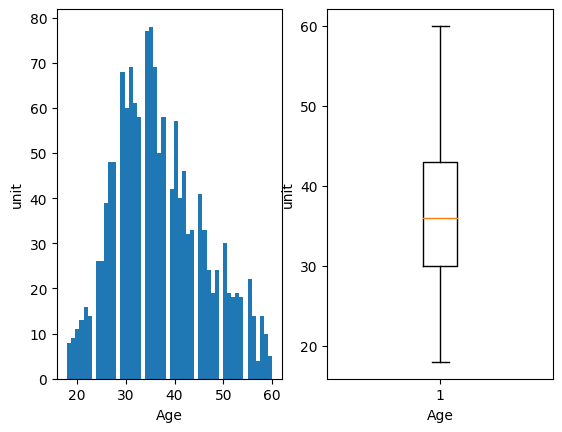

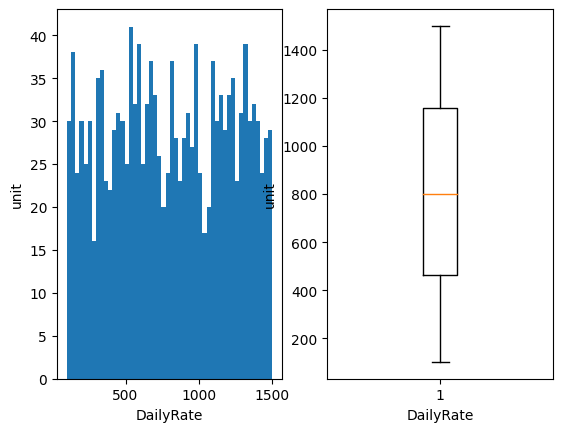

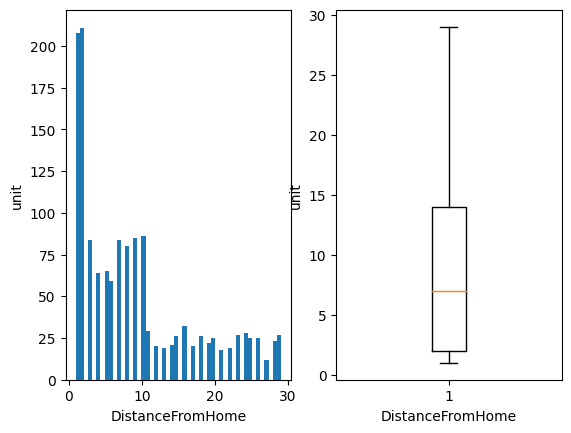

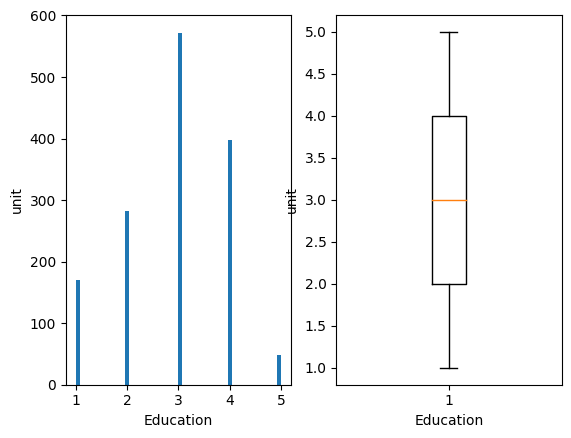

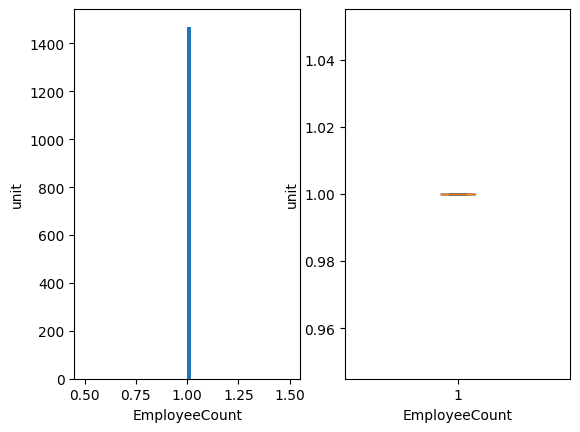

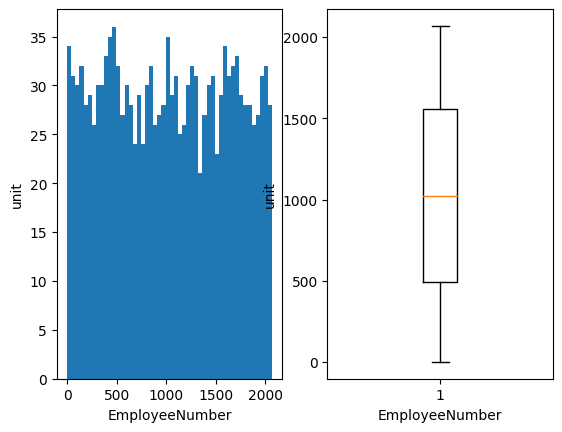

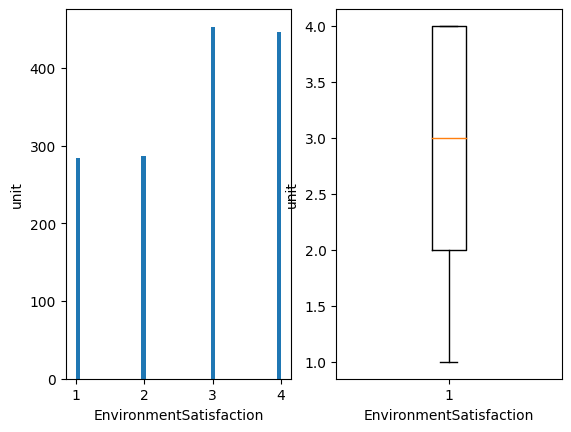

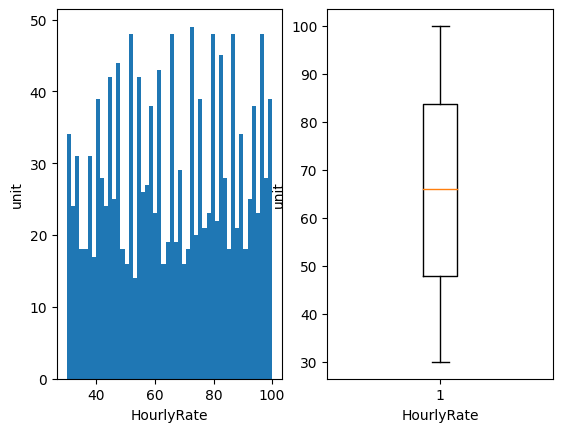

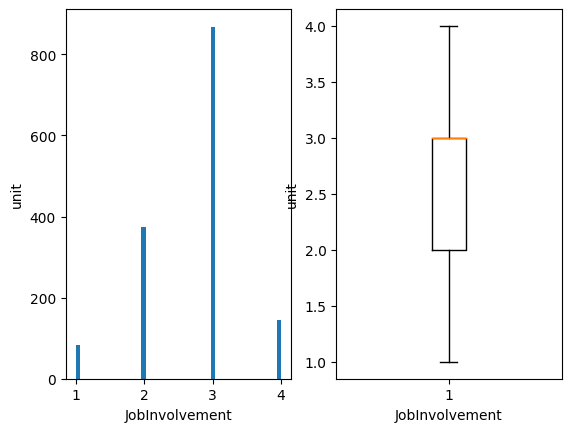

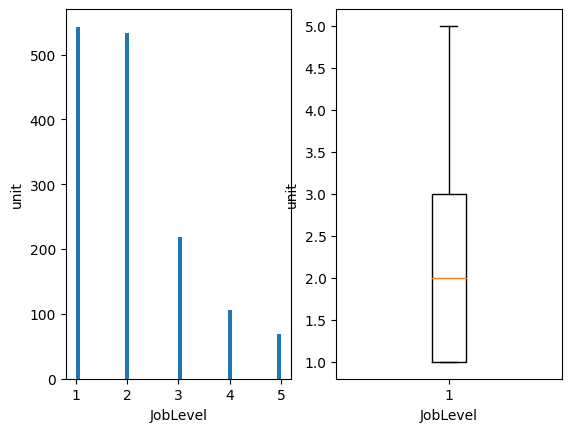

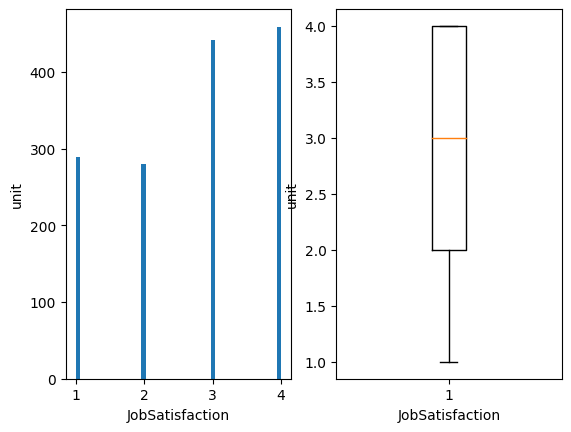

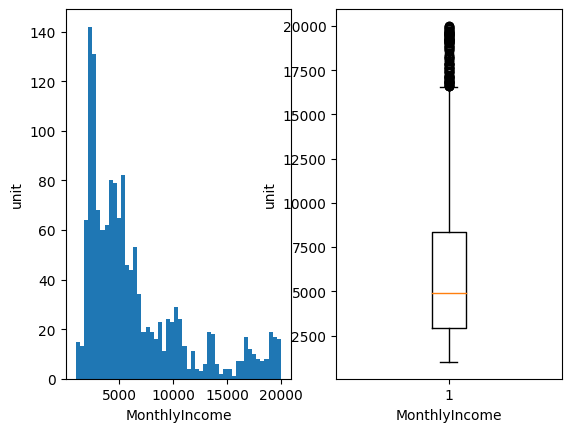

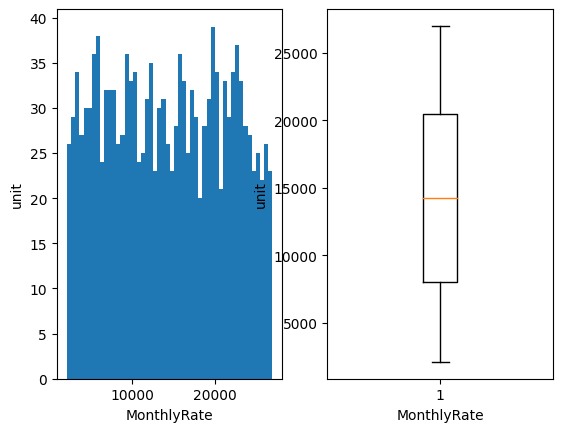

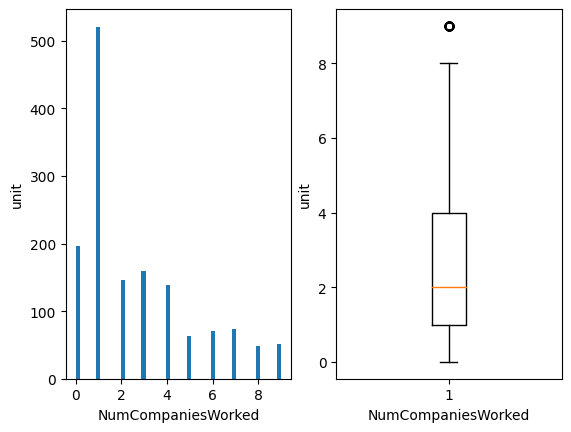

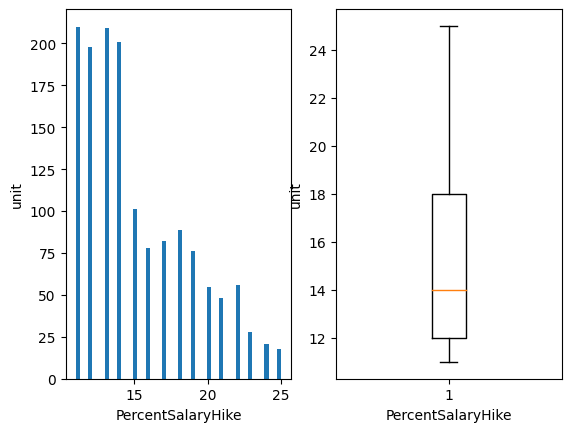

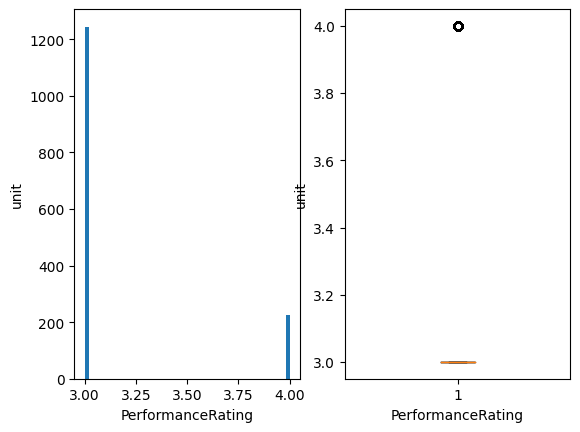

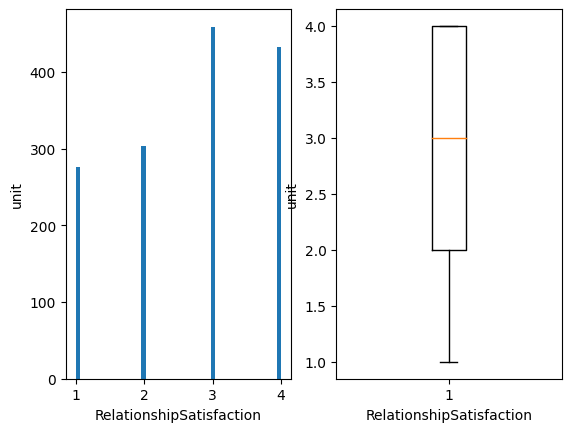

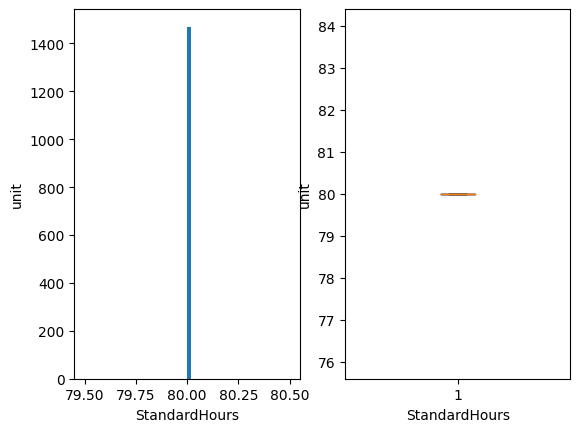

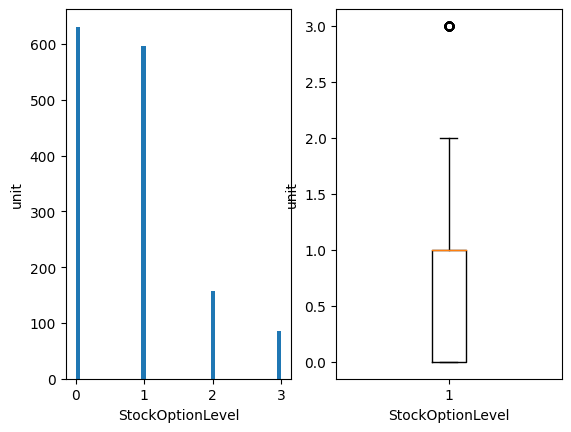

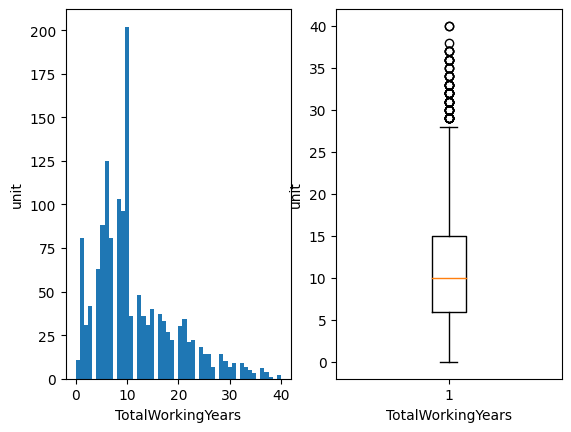

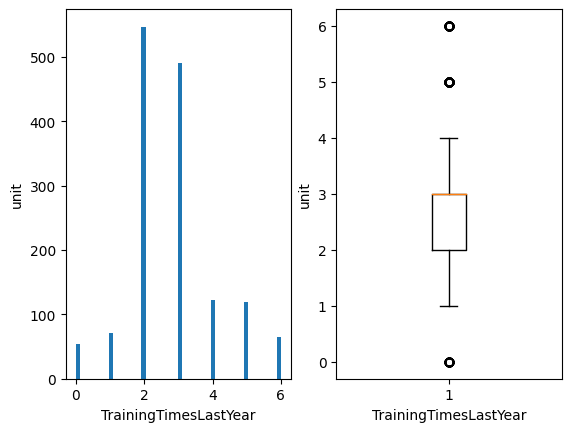

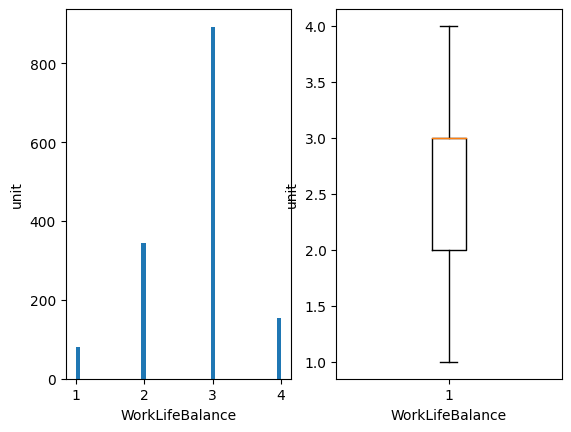

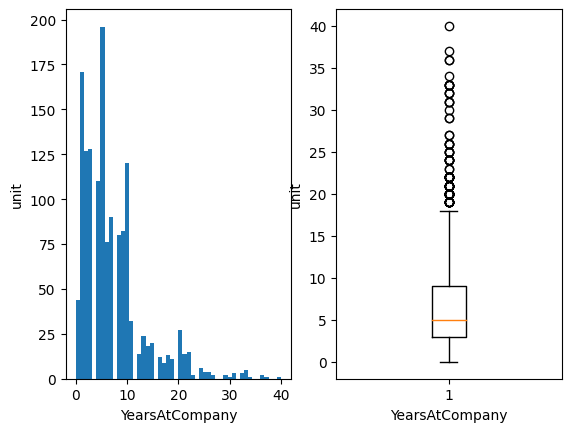

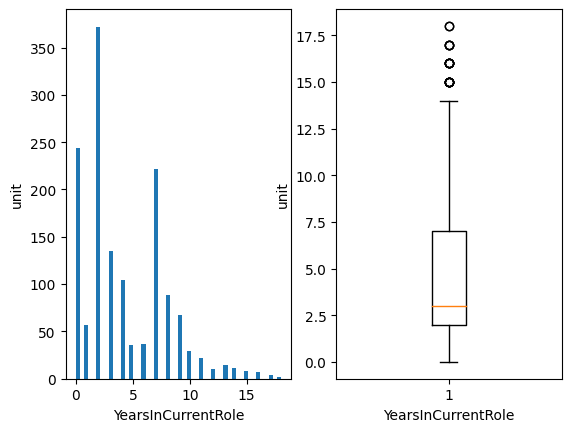

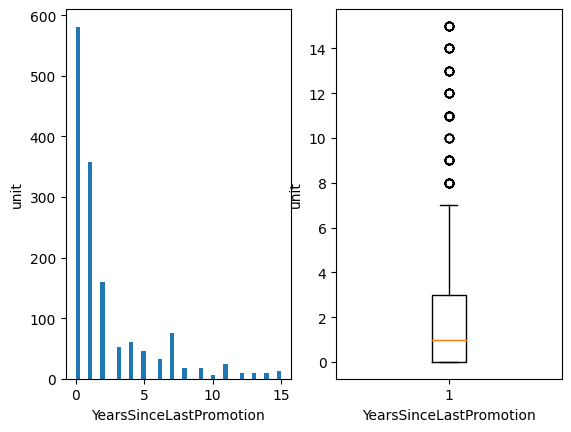

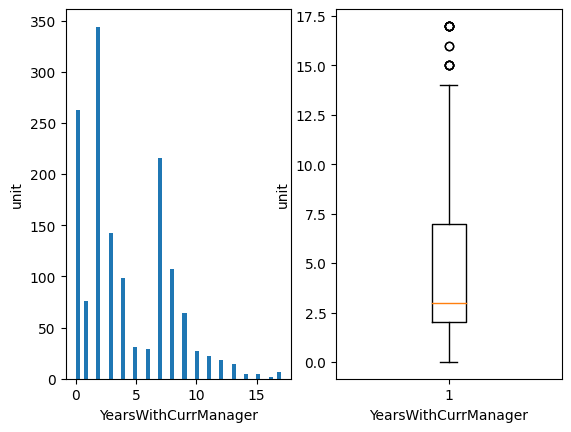

In [11]:
# step2:EDA( Univariate/Bivariate)

# Univariate analysis of numerical columns by using histogram
for i in numCols:
  plt.subplot(1,2,1)
  plt.hist(data[i],bins = 50)
  plt.xlabel(i)
  plt.ylabel('unit')

  plt.subplot(1,2,2)
  plt.boxplot(data[i])
  plt.xlabel(i)
  plt.ylabel('unit')
  plt.show()

In [12]:
# Univariate analysis of the categoriacl columns with value_counts

for i in catCols:
  print('column:',i)
  print(data[i].value_counts())
  print('--------------------------------------')

column: Attrition
0    1233
1     237
Name: Attrition, dtype: int64
--------------------------------------
column: BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
--------------------------------------
column: Department
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
--------------------------------------
column: EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
--------------------------------------
column: Gender
Male      882
Female    588
Name: Gender, dtype: int64
--------------------------------------
column: JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager 

                               Age  Attrition  DailyRate  DistanceFromHome  \
Age                       1.000000  -0.159205   0.010661         -0.001686   
Attrition                -0.159205   1.000000  -0.056652          0.077924   
DailyRate                 0.010661  -0.056652   1.000000         -0.004985   
DistanceFromHome         -0.001686   0.077924  -0.004985          1.000000   
Education                 0.208034  -0.031373  -0.016806          0.021042   
EmployeeCount                  NaN        NaN        NaN               NaN   
EmployeeNumber           -0.010145  -0.010577  -0.050990          0.032916   
EnvironmentSatisfaction   0.010146  -0.103369   0.018355         -0.016075   
HourlyRate                0.024287  -0.006846   0.023381          0.031131   
JobInvolvement            0.029820  -0.130016   0.046135          0.008783   
JobLevel                  0.509604  -0.169105   0.002966          0.005303   
JobSatisfaction          -0.004892  -0.103481   0.030571        

<Axes: >

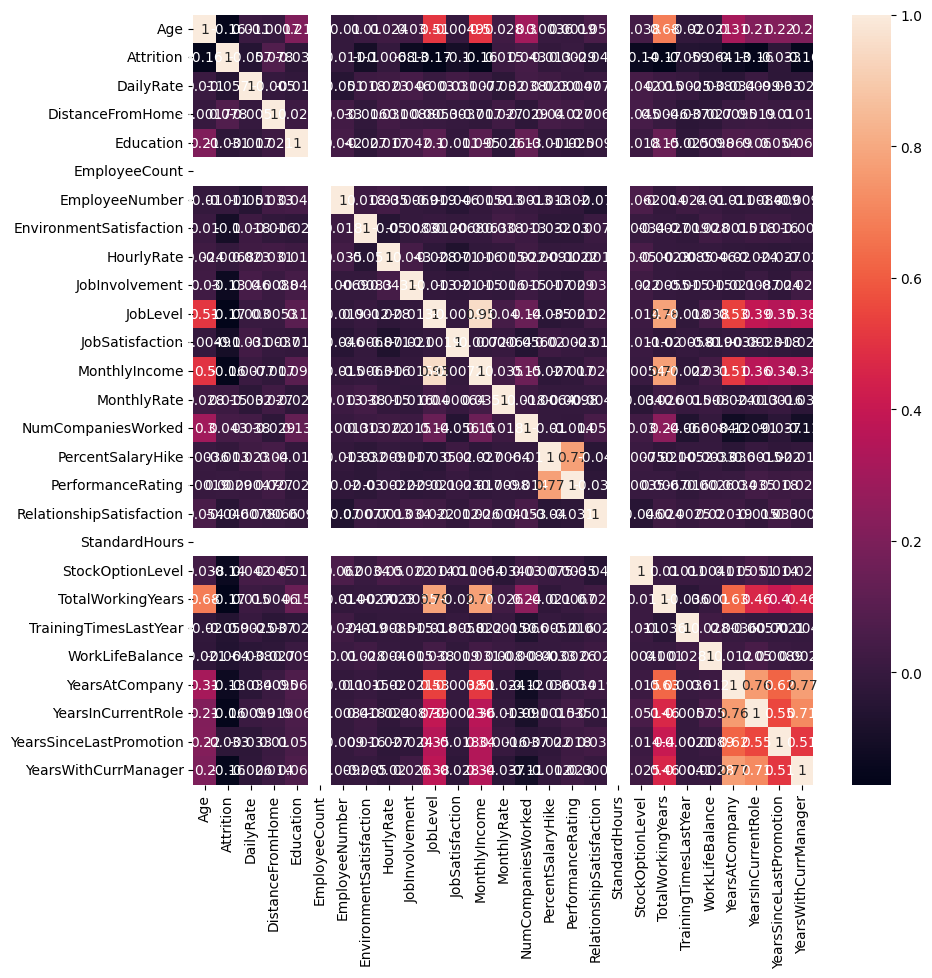

In [14]:
# Bivariate analysis of numeriacl columns by co-relation matrix
import seaborn as sns
matrix = data.corr()
print(matrix)

fig,ax = plt.subplots(figsize =(10,10))
sns.heatmap(matrix,annot = True)

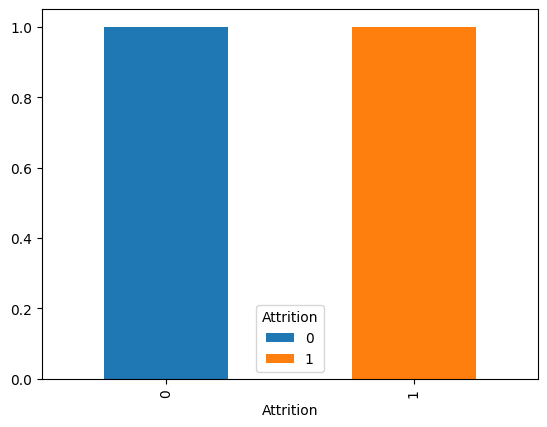

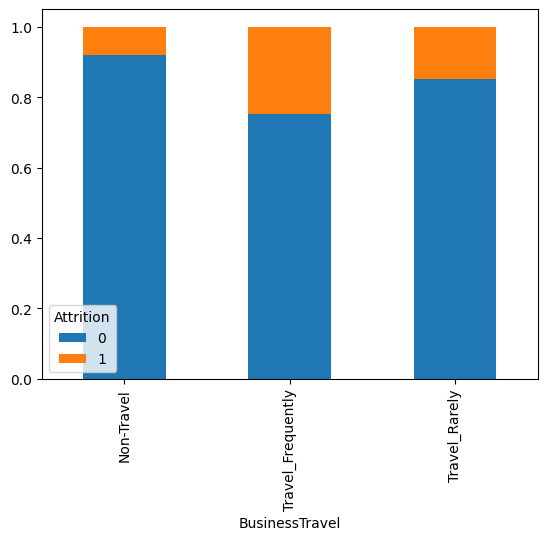

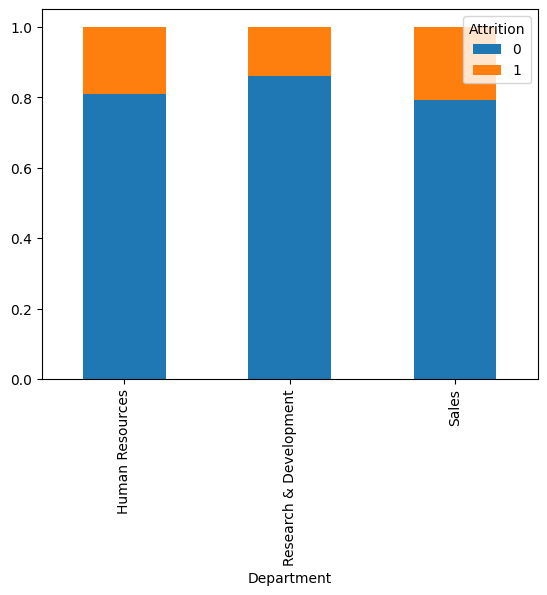

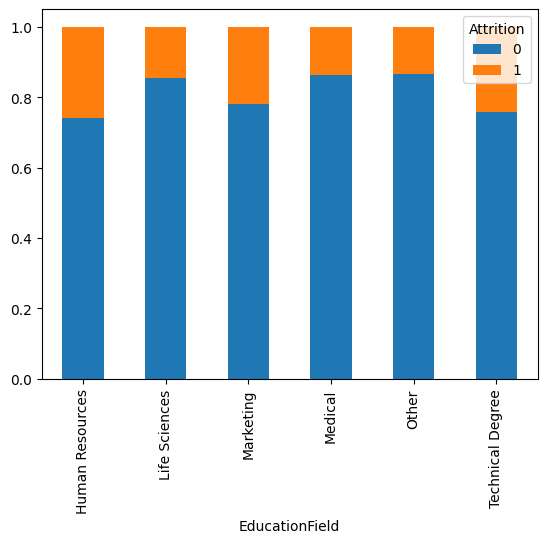

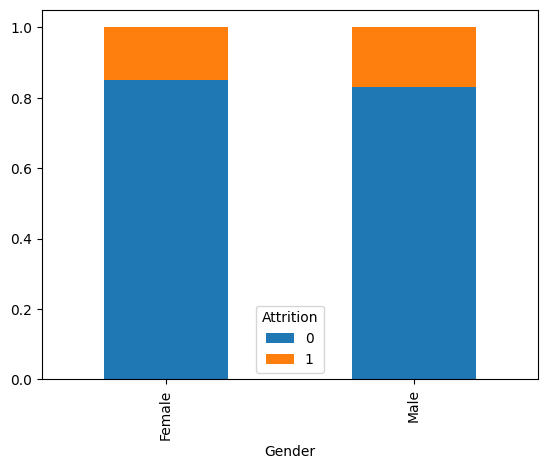

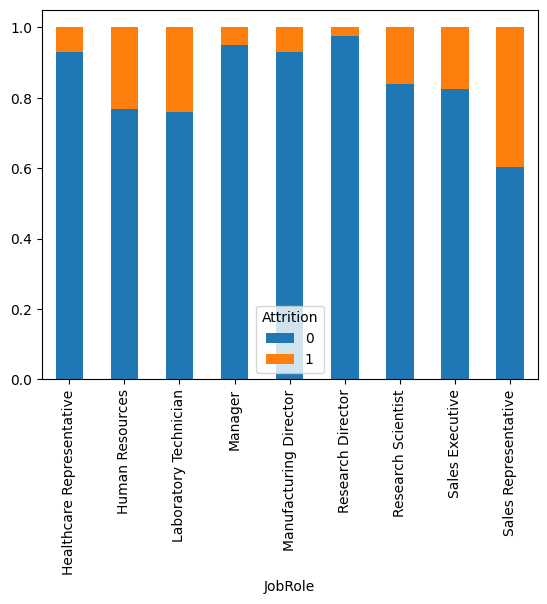

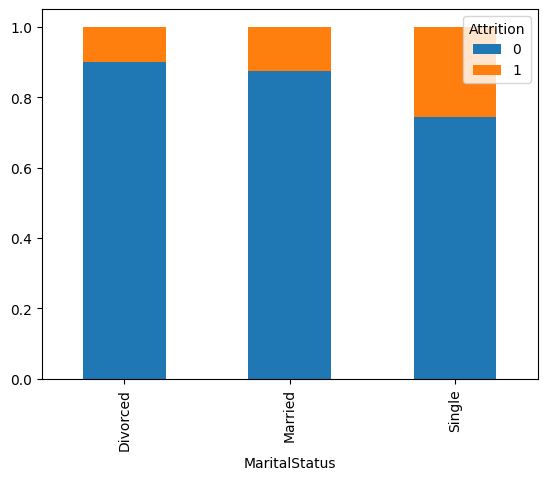

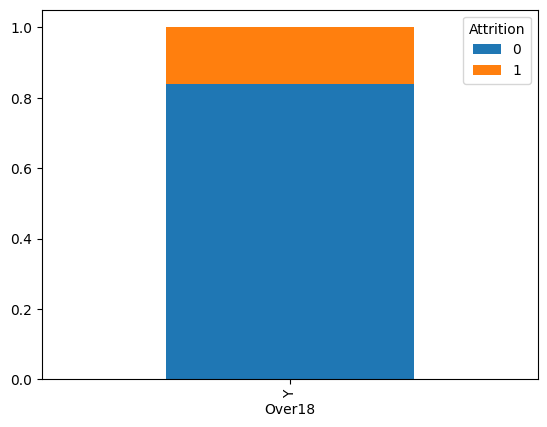

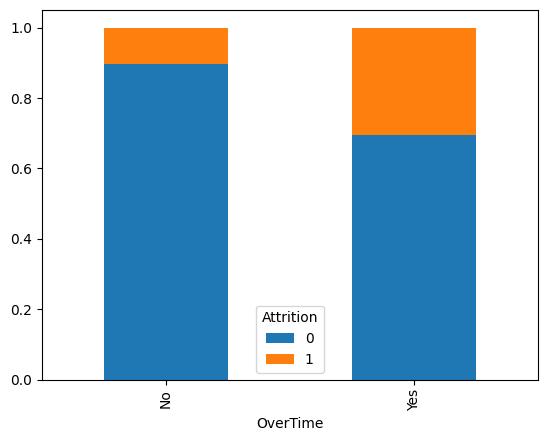

In [15]:
# Bivariate analysis of Categoriacal columns by crosstab

for i in catCols:
  category = pd.crosstab(data[i],data['Attrition'])
  category.div(category.sum(1).astype(float),axis =0 ).plot(kind = 'bar',stacked = True)
  try:

    plt.show()
  except:
    pass

# 3. Missing Data Analysis

In [16]:
# Step 3:Missing data
# lets analyse if the data contains any missing values
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

## 4. Numerical data analysis

numerical columns: Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object') 26
   Age  DailyRate  DistanceFromHome  Education  EmployeeCount  EmployeeNumber  \
0   41       1102                 1          2              1               1   
1   49        279                 8          1              1               2   
2   37       1373                 2          2              1               4   
3   33       1392                 3          4              1               5   

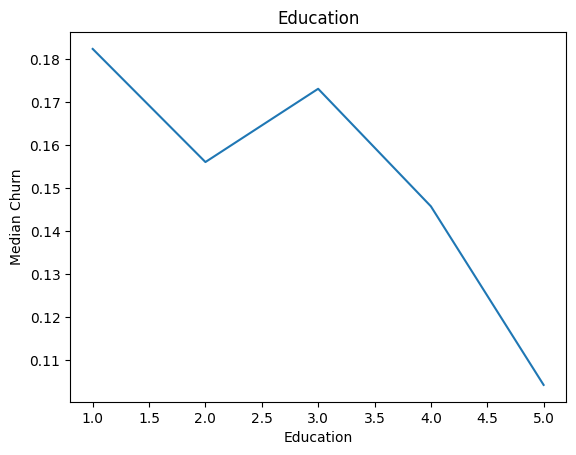

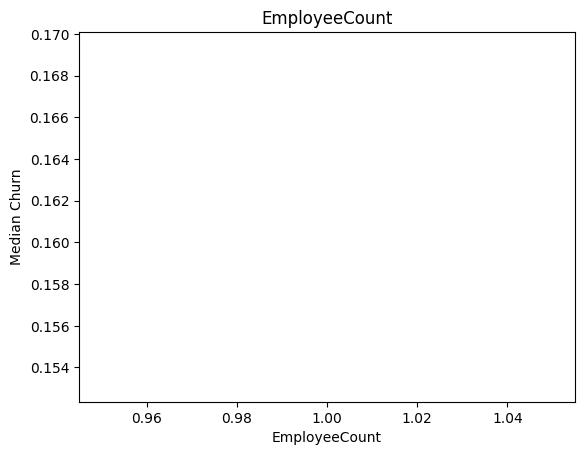

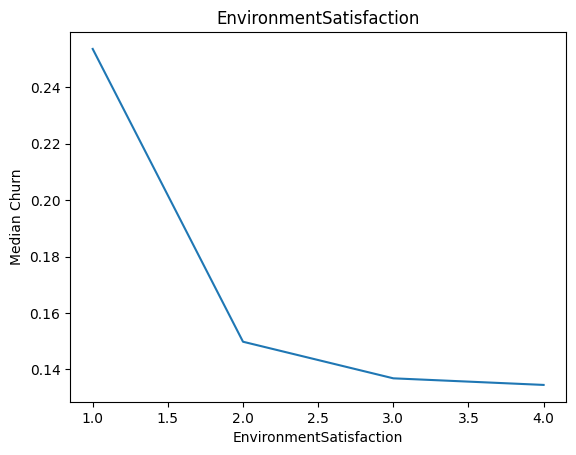

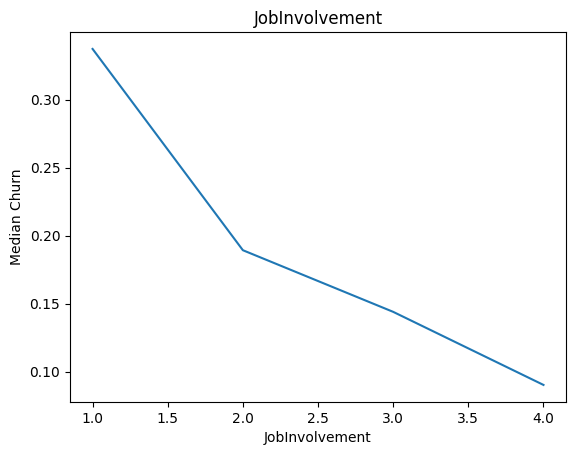

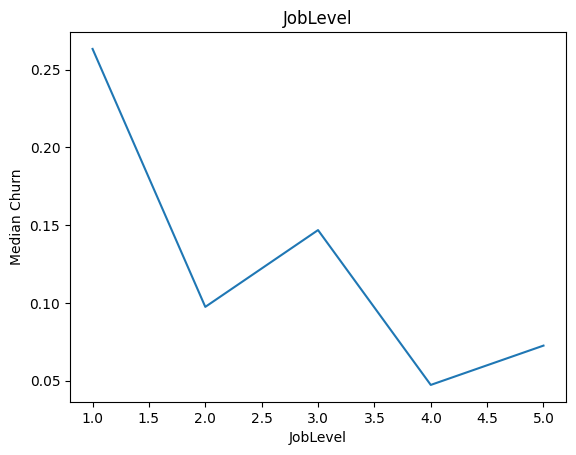

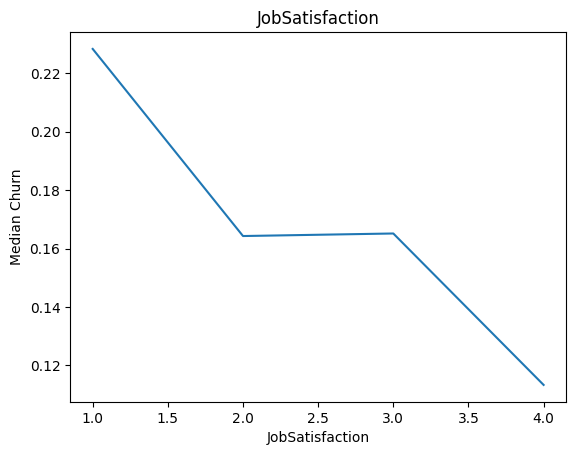

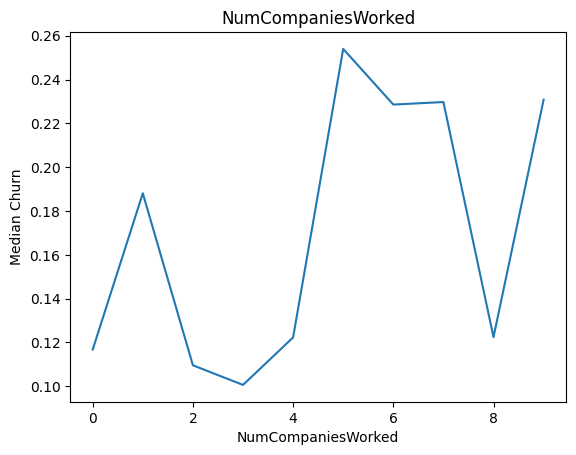

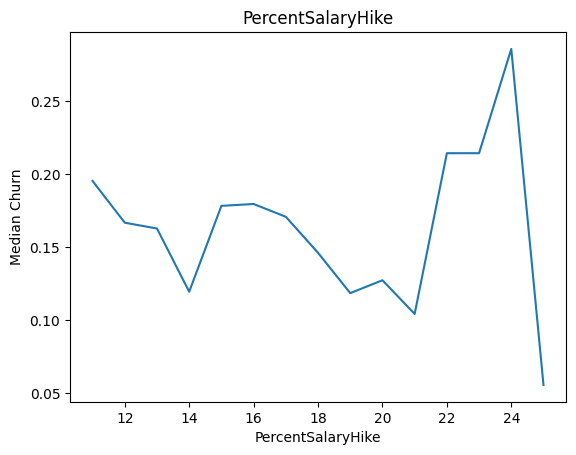

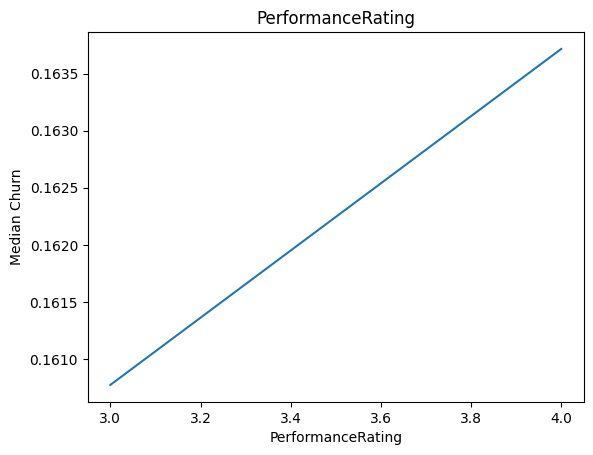

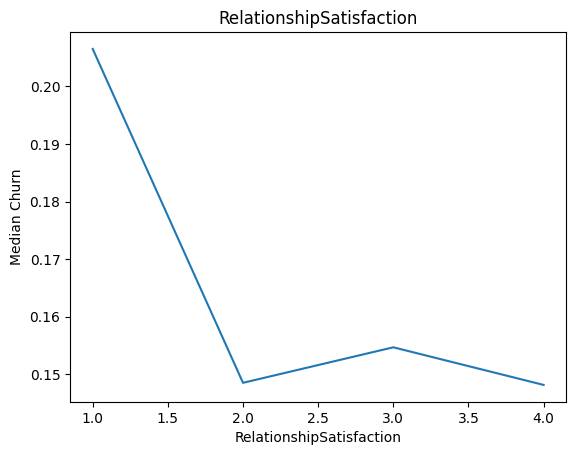

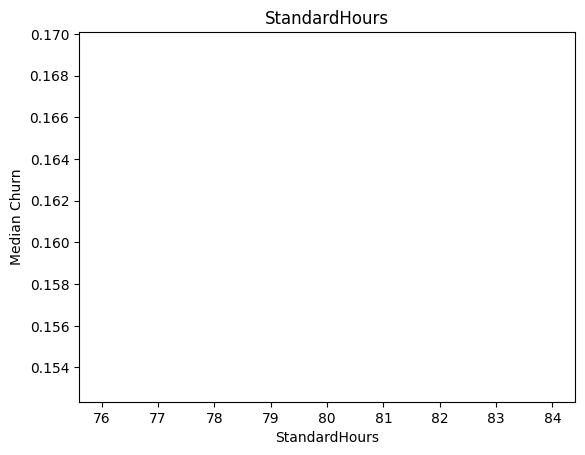

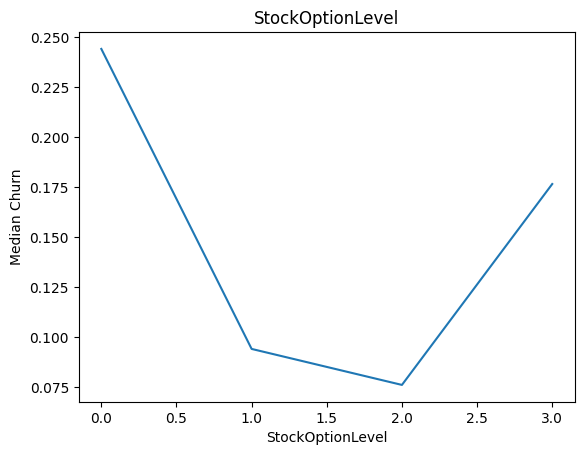

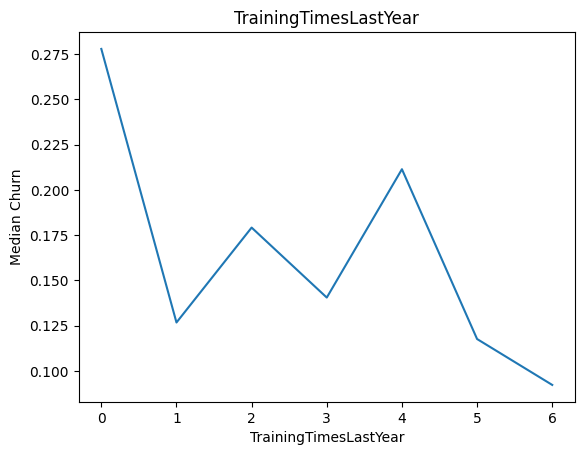

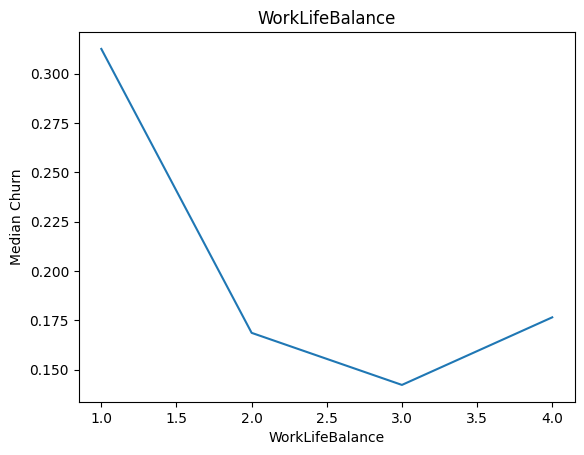

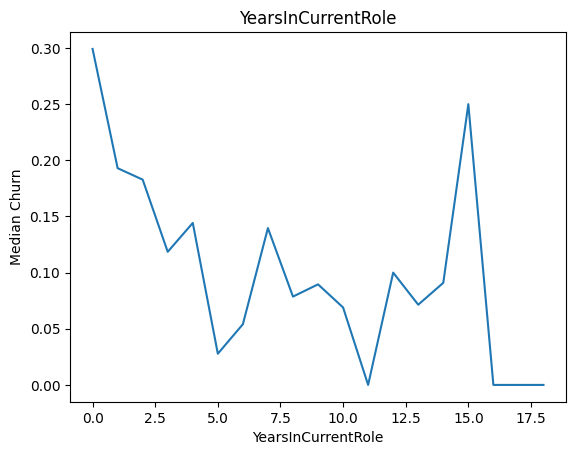

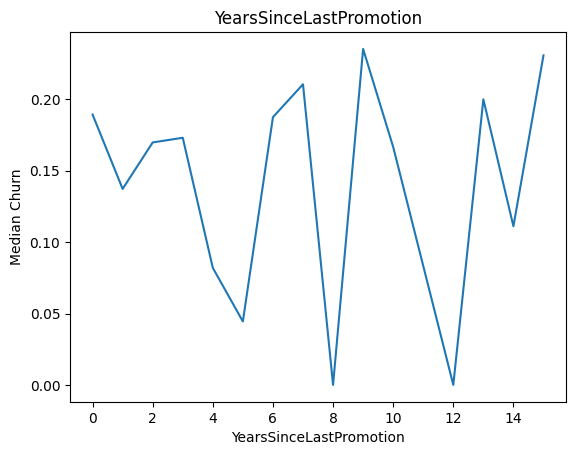

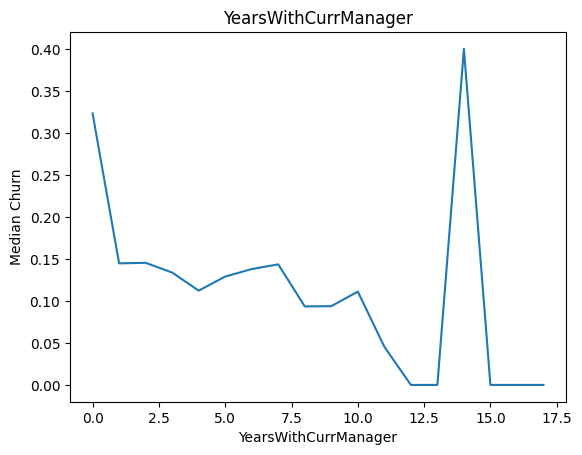

In [18]:
# step 4:Numerical data analysis

print('numerical columns:',numCols,len(numCols))

# -> 1. visualize numerical columns
print(data[numCols].head())

# ->2.lets make list of discrete variables among numerical columns

discrete_numCols = [var for var in numCols if len(data[var].unique()) < 20]
print('discrete columns in numericals columns:',discrete_numCols,len(discrete_numCols))

# visualize discrete columns
data[discrete_numCols].head()

# visualize their relationship to the target
def analyse_discrete(df,var):
  df=df.copy()
  # df[var].hist(bins=50)
  df.groupby(var)['Attrition'].mean().plot()
  plt.title(var)
  plt.ylabel('Median Churn')
  plt.show()

# lets run for each column in discrete_numCols
for var in discrete_numCols:
  analyse_discrete(data,var)

continuous numerical columns: ['Age', 'DailyRate', 'DistanceFromHome', 'EmployeeNumber', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'TotalWorkingYears', 'YearsAtCompany'] 9
   Age  DailyRate  DistanceFromHome  EmployeeNumber  HourlyRate  \
0   41       1102                 1               1          94   
1   49        279                 8               2          61   
2   37       1373                 2               4          92   
3   33       1392                 3               5          56   
4   27        591                 2               7          40   

   MonthlyIncome  MonthlyRate  TotalWorkingYears  YearsAtCompany  
0           5993        19479                  8               6  
1           5130        24907                 10              10  
2           2090         2396                  7               0  
3           2909        23159                  8               8  
4           3468        16632                  6               2  


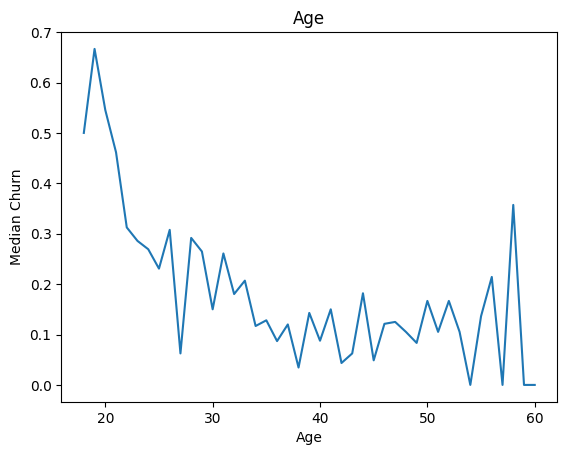

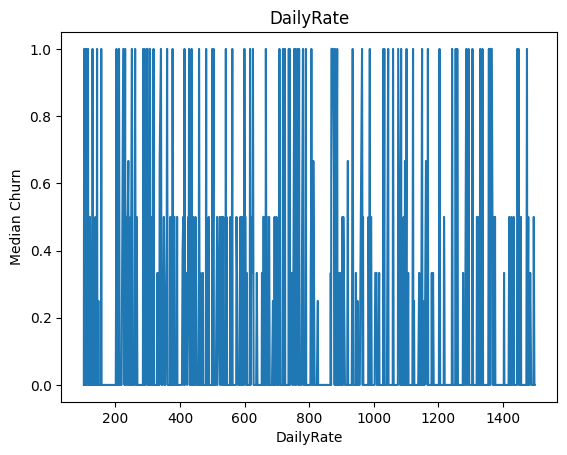

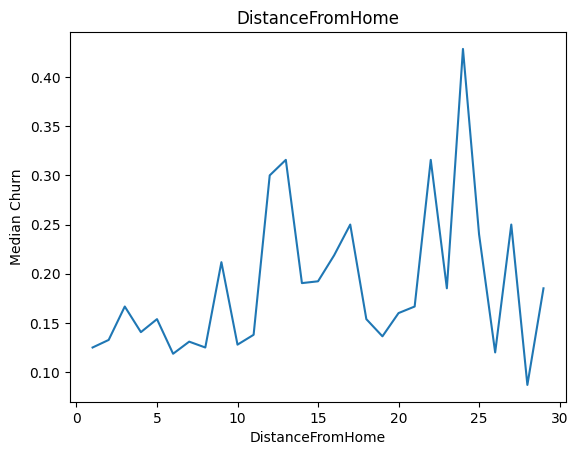

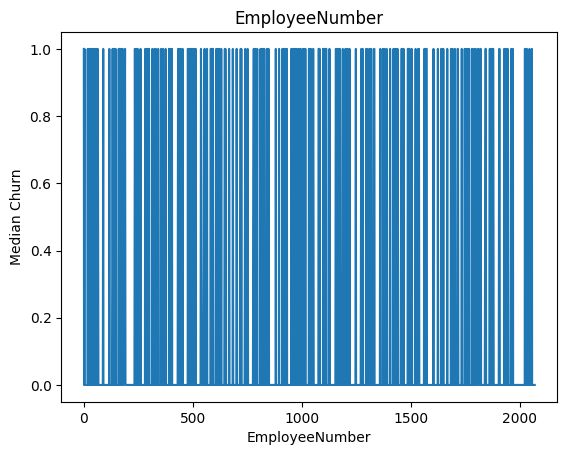

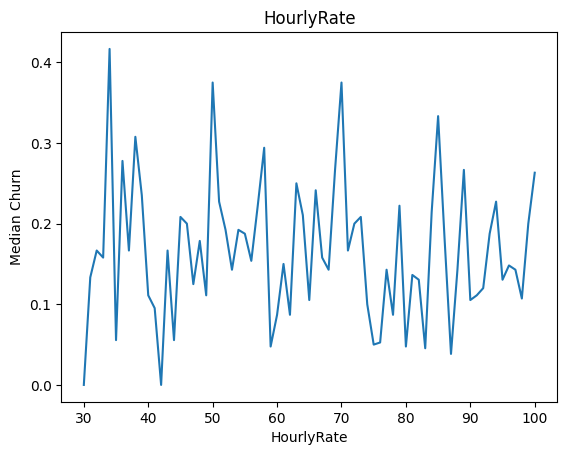

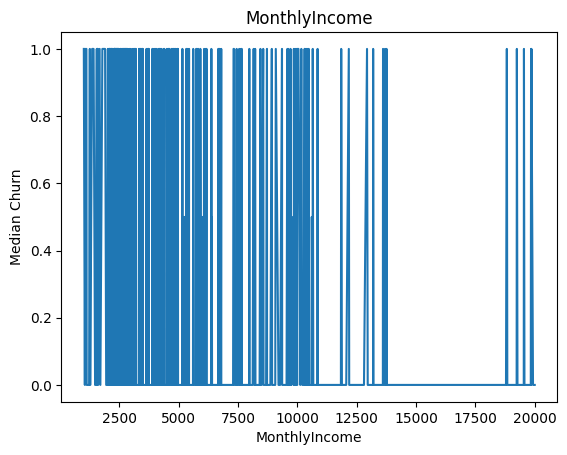

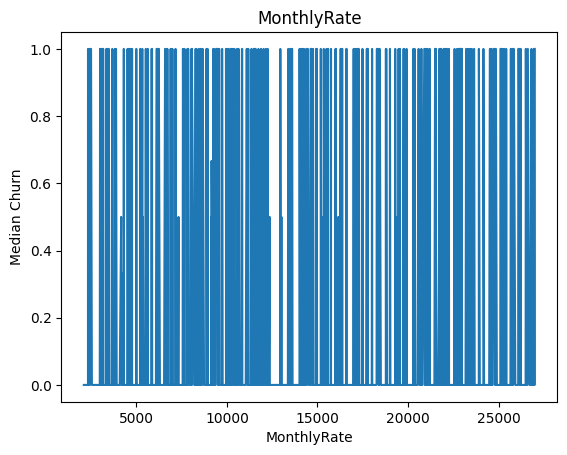

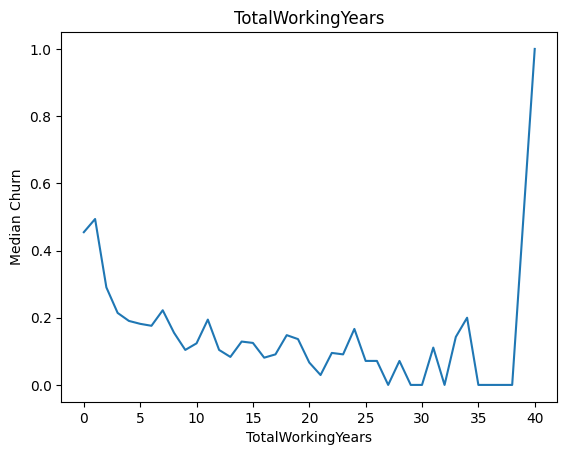

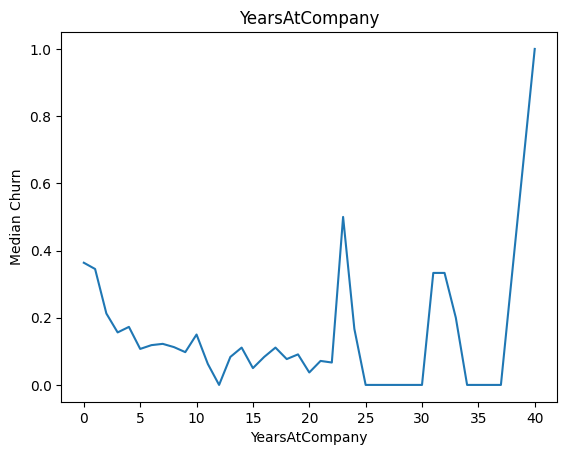

In [19]:
# ->3. lets make a list of continuous numerical column

cont_numCols = [var for var in numCols if len(data[var].unique())>20]
print('continuous numerical columns:',cont_numCols,len(cont_numCols))

# visualize
print(data[cont_numCols].head())

# # visualize their relationship to the target
def analyse_continuous(df,var):
  df=df.copy()
  # df[var].hist(bins=50)
  df.groupby(var)['Attrition'].mean().plot()
  plt.title(var)
  plt.ylabel('Median Churn')
  plt.show()

# lets run for each column in cont_numCols
for var in cont_numCols:
  analyse_continuous(data,var)

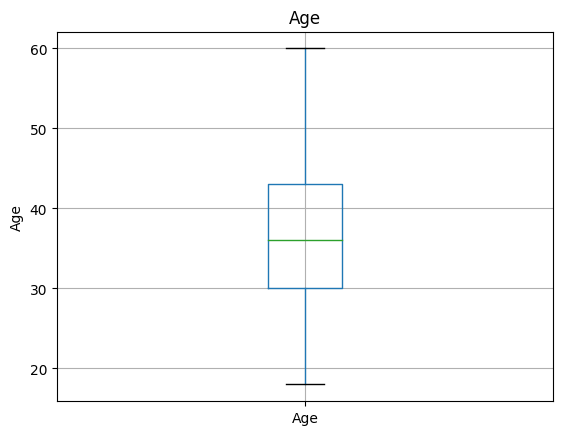

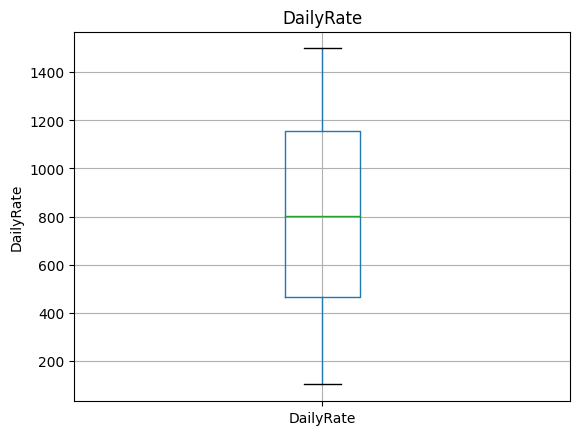

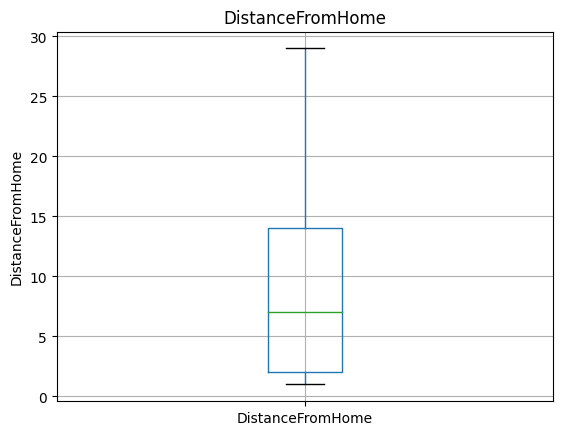

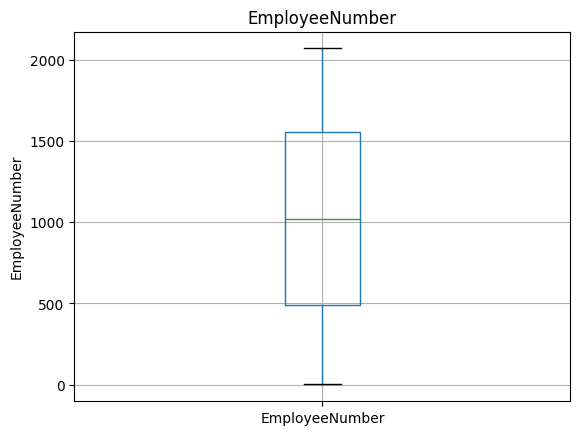

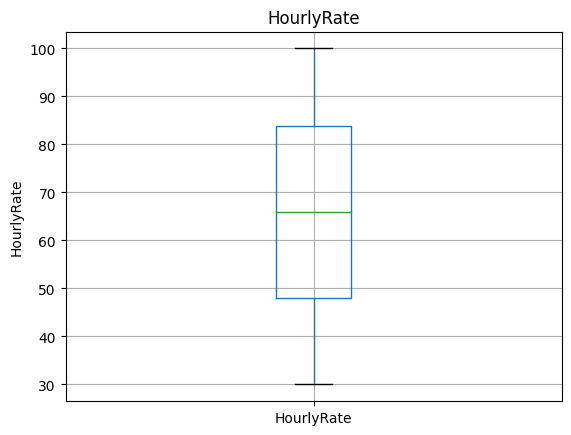

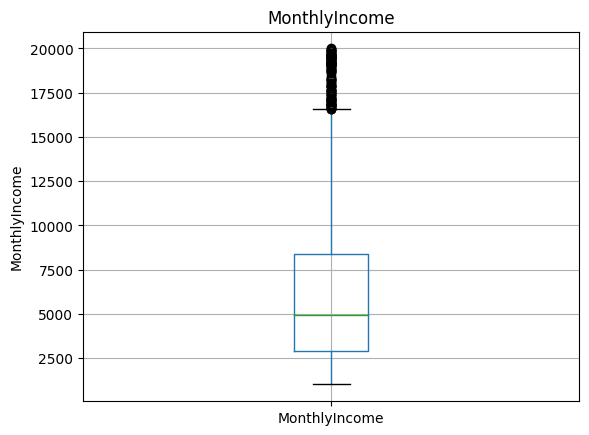

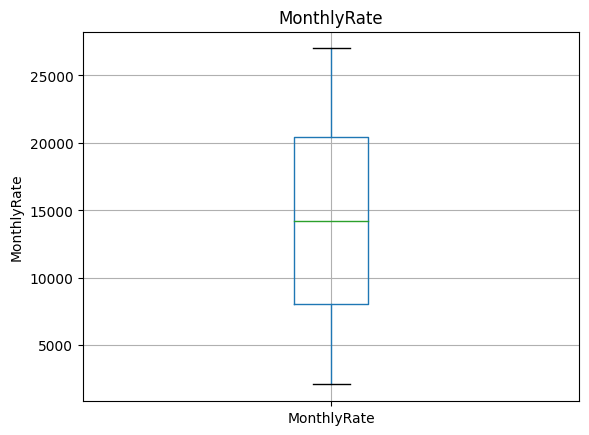

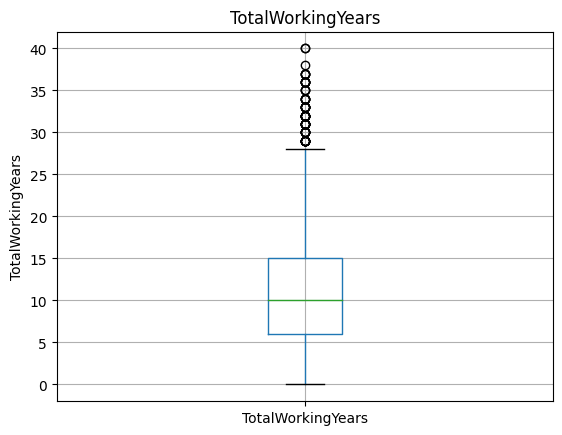

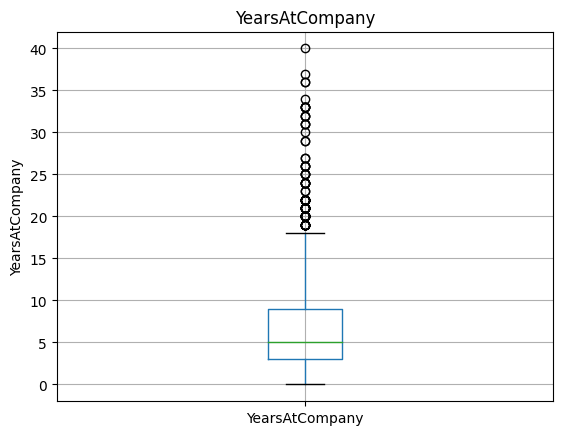

In [20]:
# step 5:Outliers presence in the data

# we will make boxplots on the continuous numeric columns to visualize the presence of outliers

def find_outliers(df,var):
  df = df.copy()
  df.boxplot(column = var)
  plt.title(var)
  plt.ylabel(var)
  plt.show()

for var in cont_numCols:
   if var not in ['RowNumber', 'CustomerId']:
    find_outliers(data,var)

# 6. Categorical data analysis

In [21]:
# step 6. Categorical data anlysis
print('categorical columns:',catCols,len(catCols))

#->1. visualize categorical variables
data[catCols].head()

categorical columns: Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object') 9


,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,1,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,0,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,1,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,0,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,0,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [22]:
# ->2.cardinality of categorical variables
print(data[catCols].nunique())

print(data.shape)

Attrition         2
BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
Over18            1
OverTime          2
dtype: int64
(1470, 35)


In [23]:
# ->3. analyse rare labels in categorical columns

def analyse_rare_vars(df,var,rare_percentage):
  df = df.copy()
  tmp = df.groupby(var)['Attrition'].count()/len(df)
  return tmp[tmp < rare_percentage]

for i in catCols:
  print(analyse_rare_vars(data,i,0.01)) #here we,consider rare percent as 1%
  print()

Series([], Name: Attrition, dtype: float64)

Series([], Name: Attrition, dtype: float64)

Series([], Name: Attrition, dtype: float64)

Series([], Name: Attrition, dtype: float64)

Series([], Name: Attrition, dtype: float64)

Series([], Name: Attrition, dtype: float64)

Series([], Name: Attrition, dtype: float64)

Series([], Name: Attrition, dtype: float64)

Series([], Name: Attrition, dtype: float64)



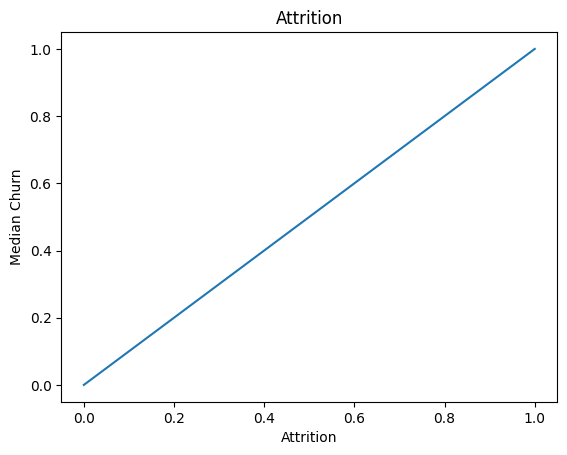

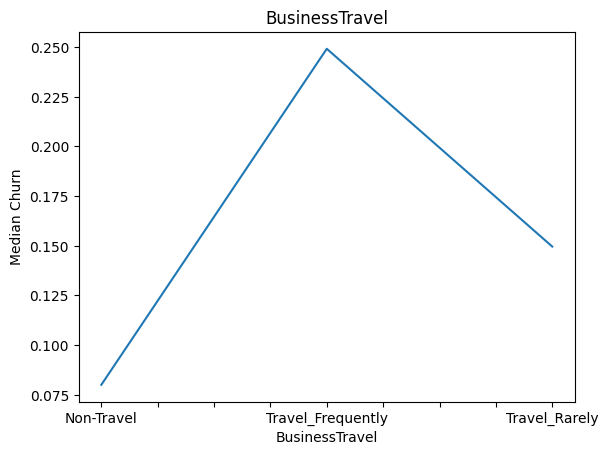

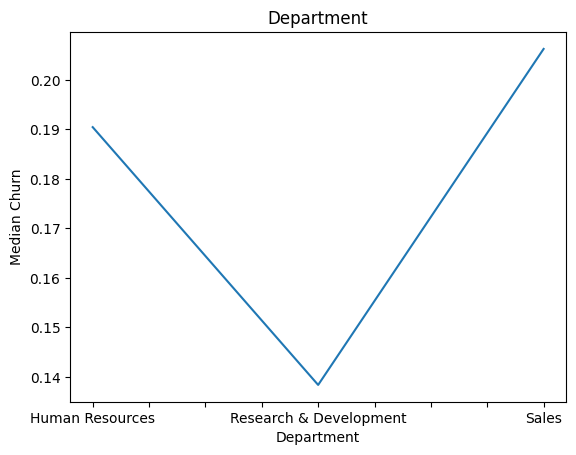

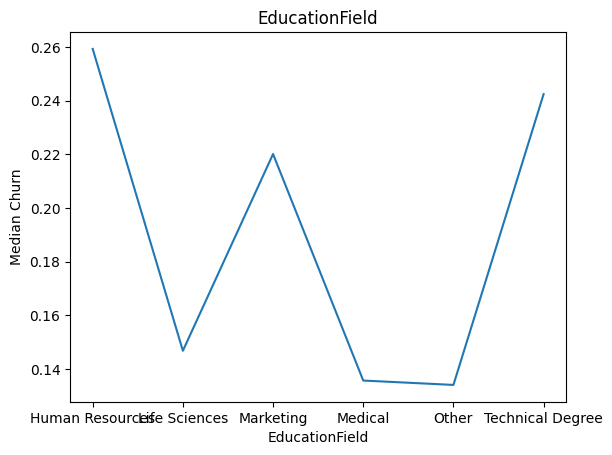

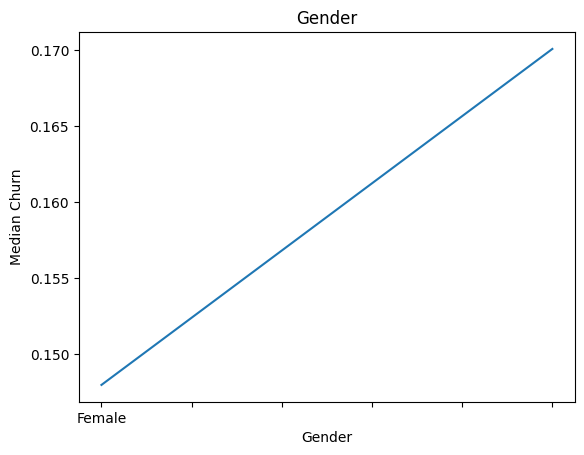

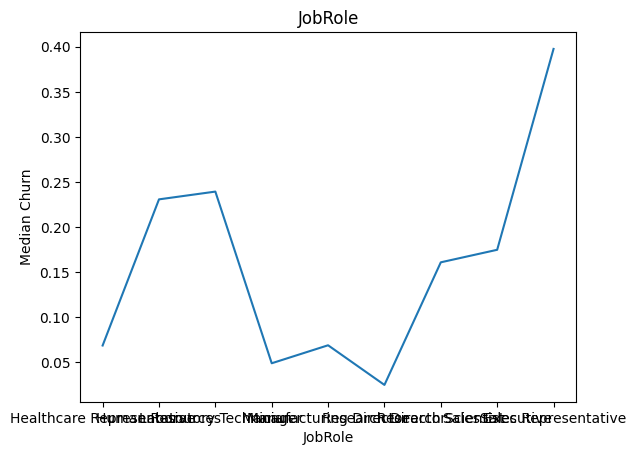

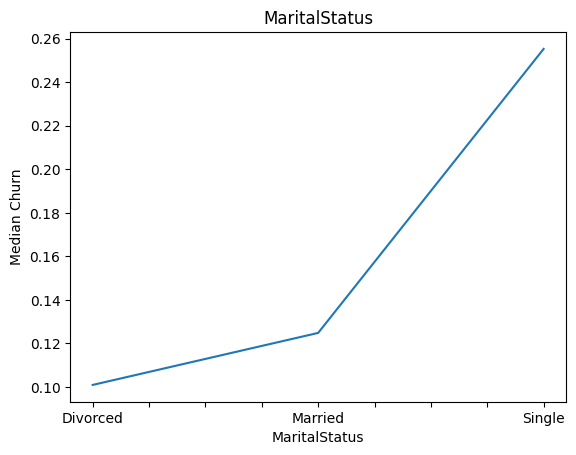

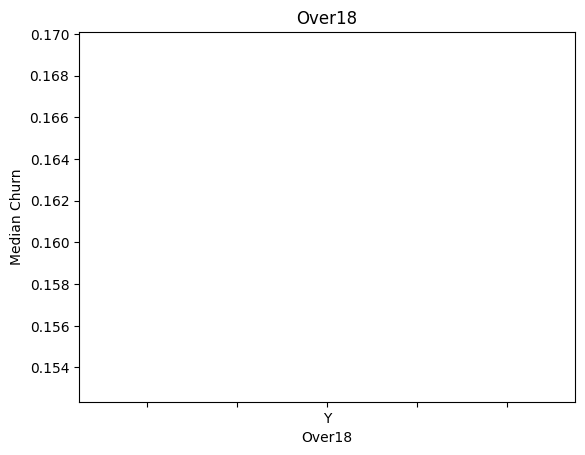

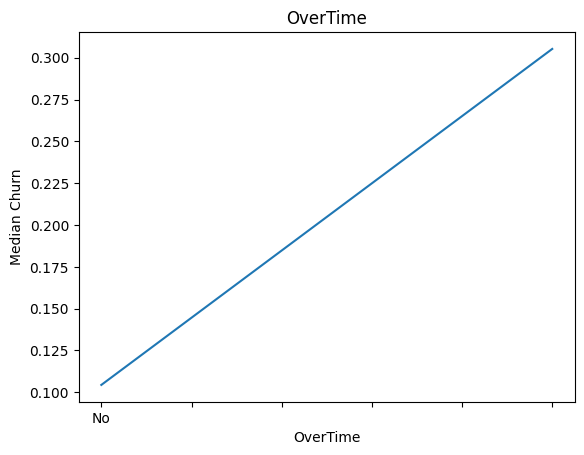

In [24]:
# ->4. analyse categorical columns to target

for i in catCols:
  analyse_discrete(data,i)

# 3. Feature Engineering
train test split

missing data treatment

temporal variable treatment

non-guassian distributed variables

rare categorical labels treatment

encoding categorical label

feature scaling

In [25]:
# 1 .Train test split
# ->step 1 .train test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data,data['Attrition'],random_state = 0,test_size = 0.2)
print(X_train.shape,X_test.shape)

(1176, 35) (294, 35)


In [26]:
X_train.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [27]:
# 2. No missing data, so no treatment is required

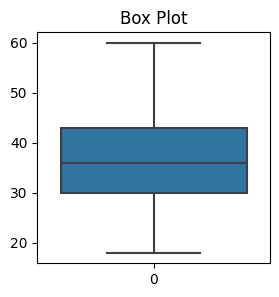

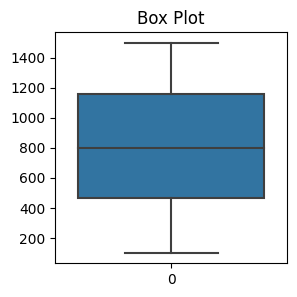

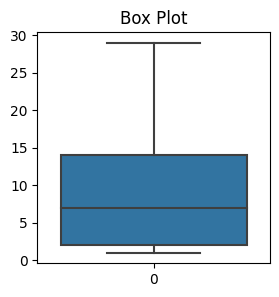

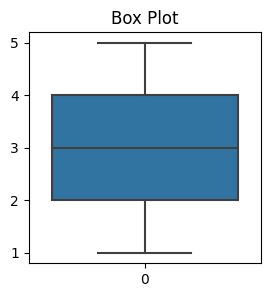

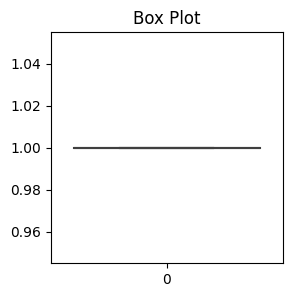

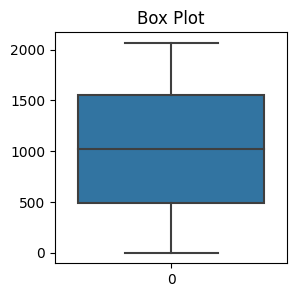

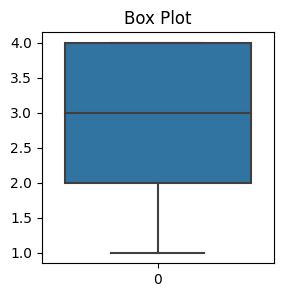

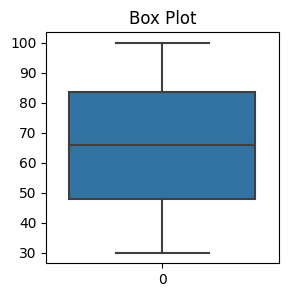

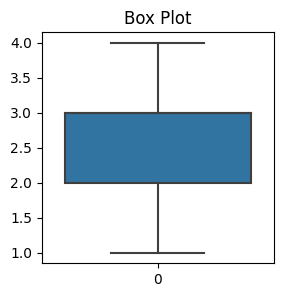

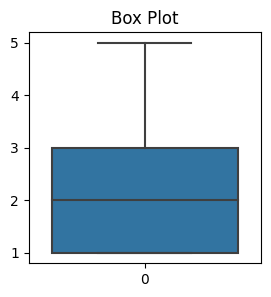

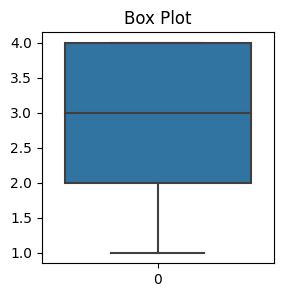

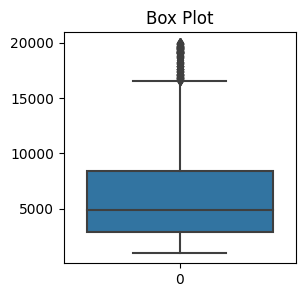

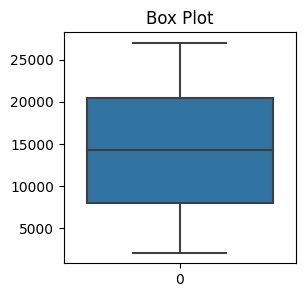

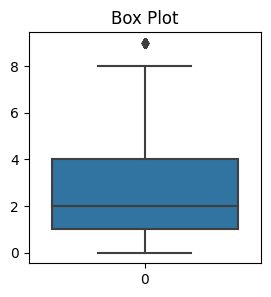

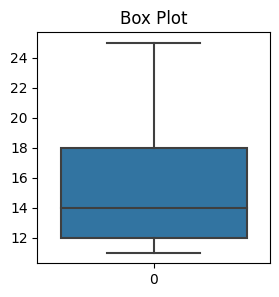

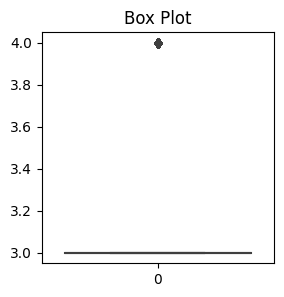

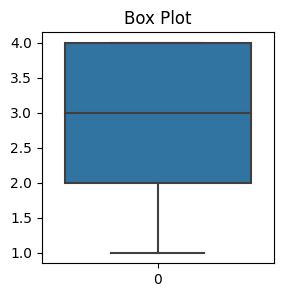

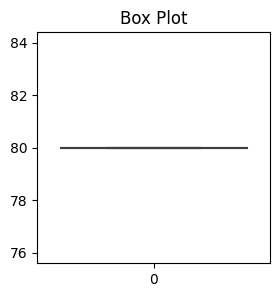

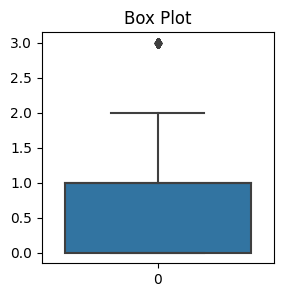

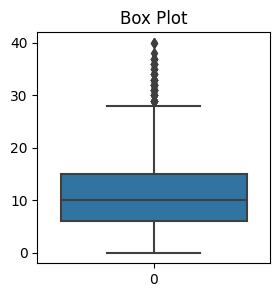

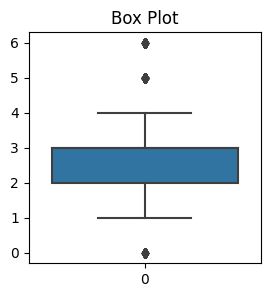

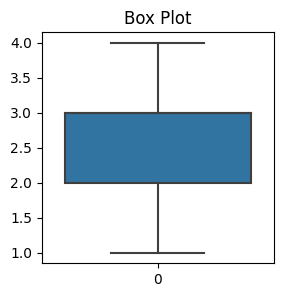

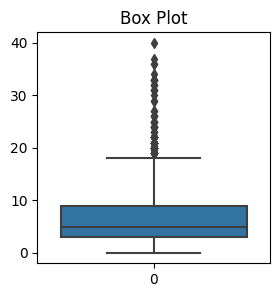

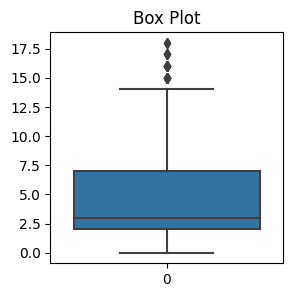

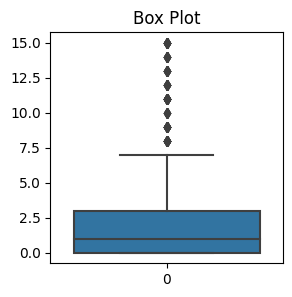

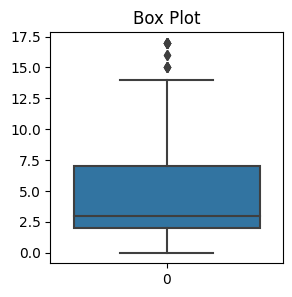

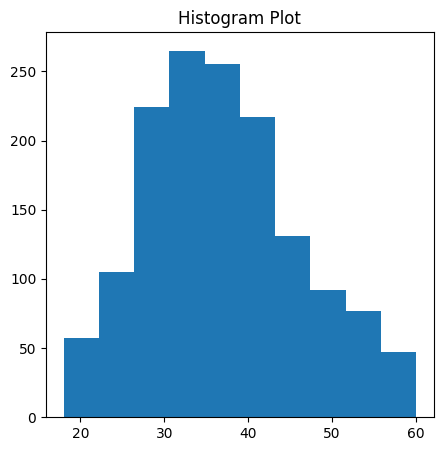

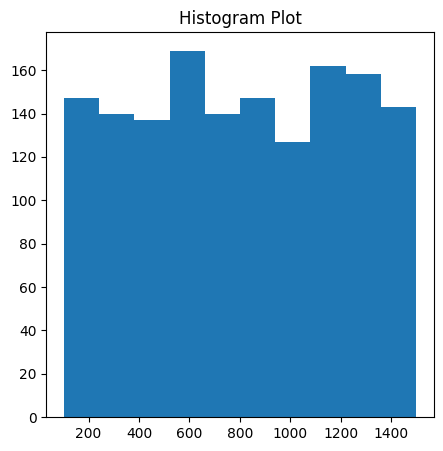

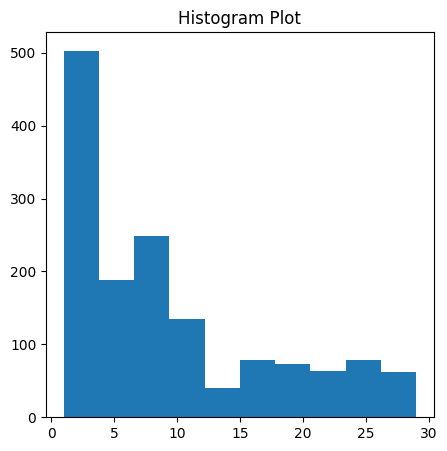

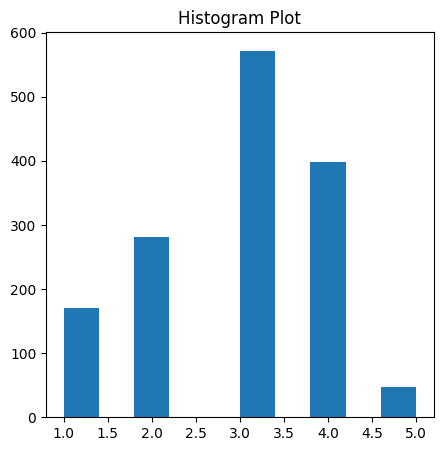

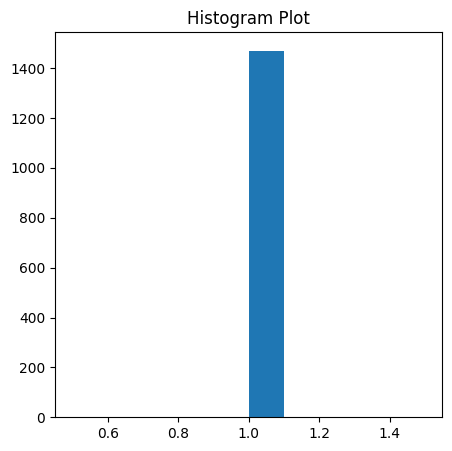

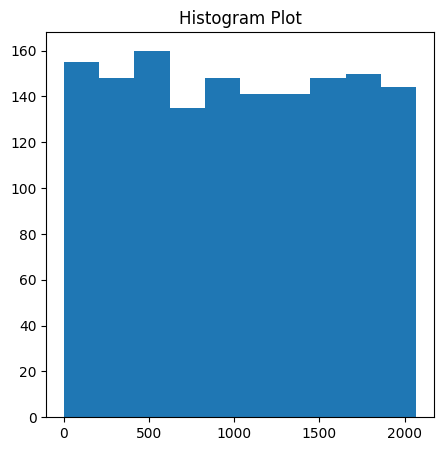

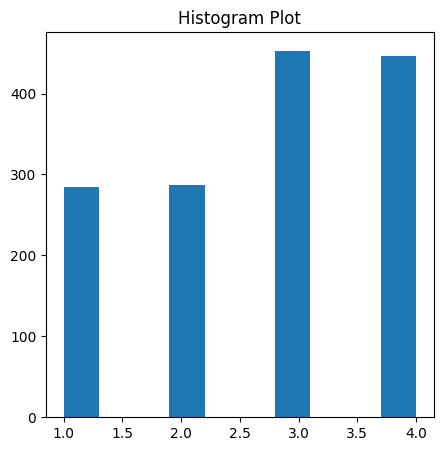

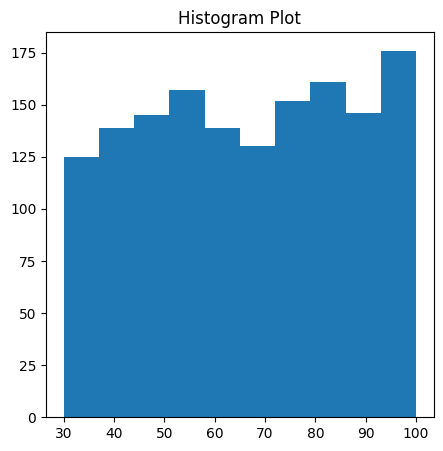

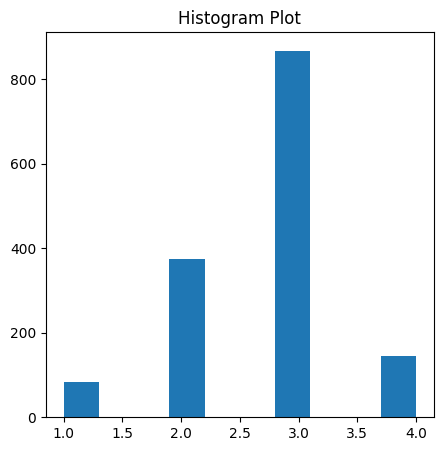

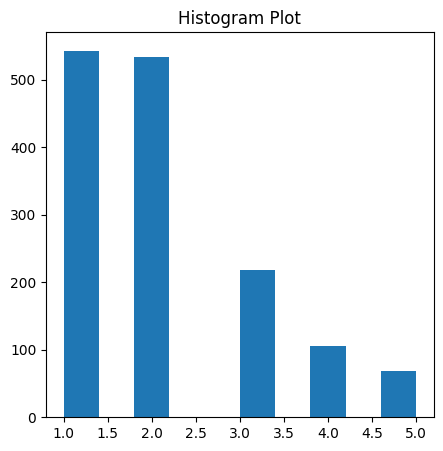

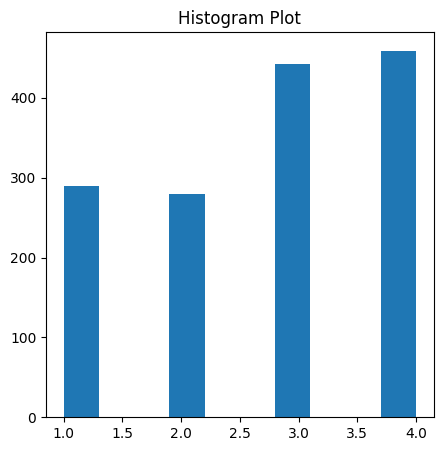

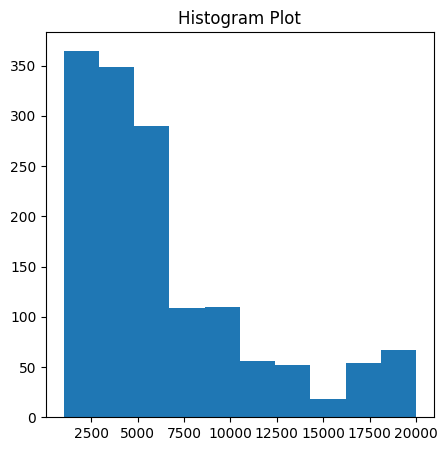

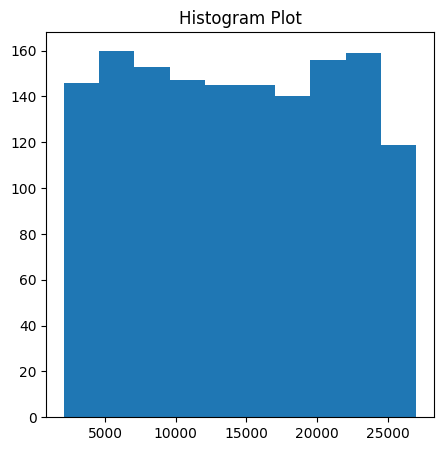

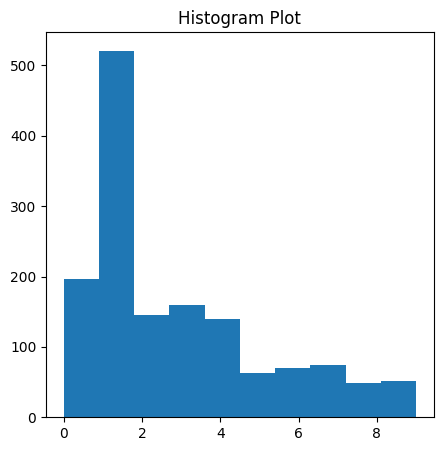

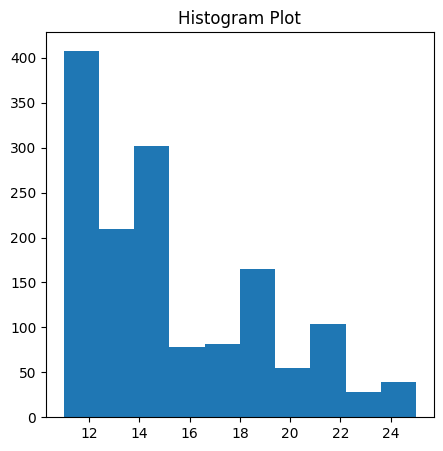

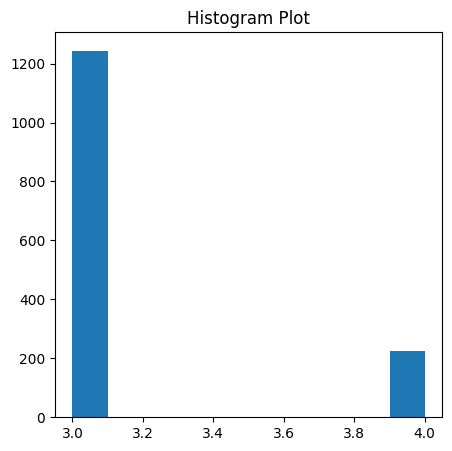

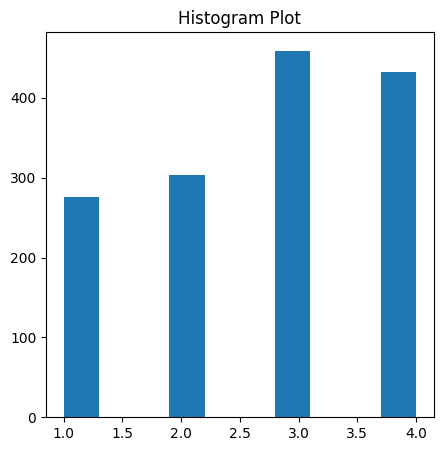

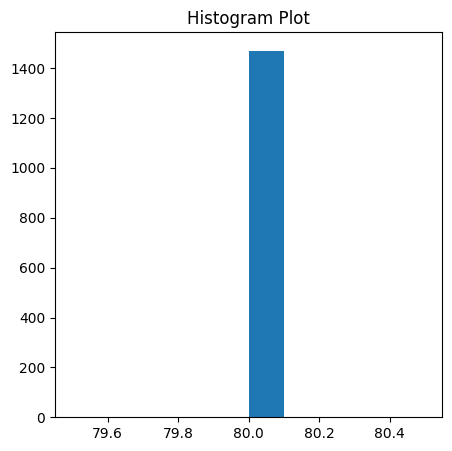

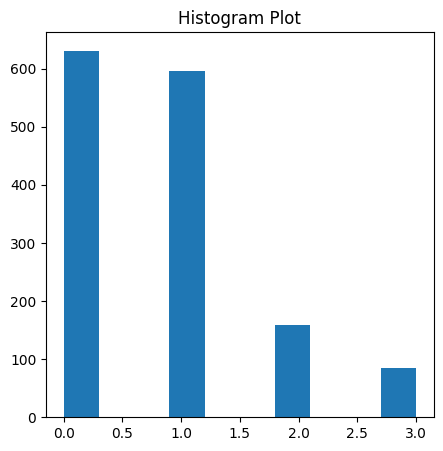

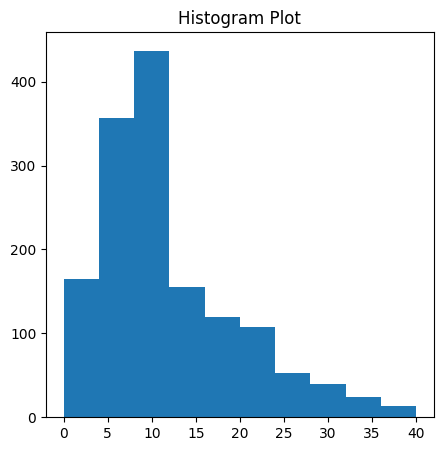

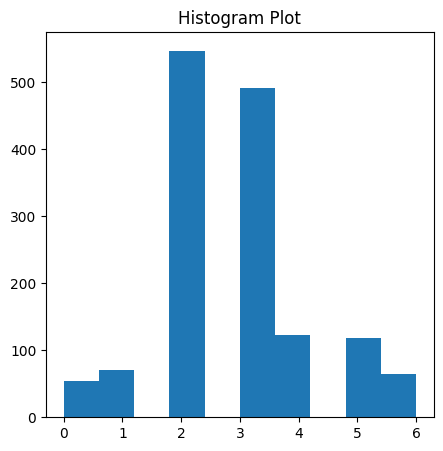

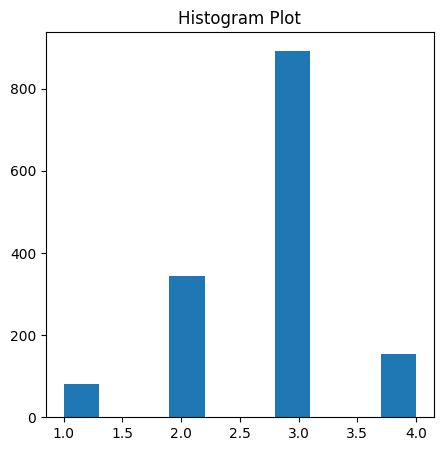

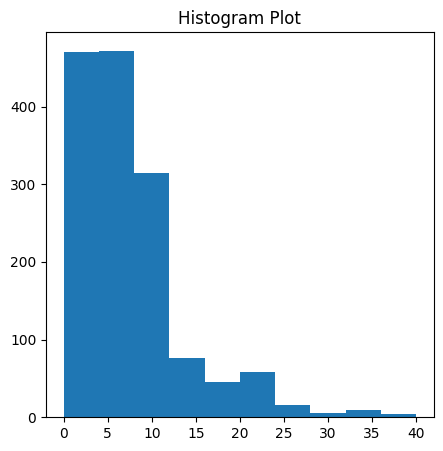

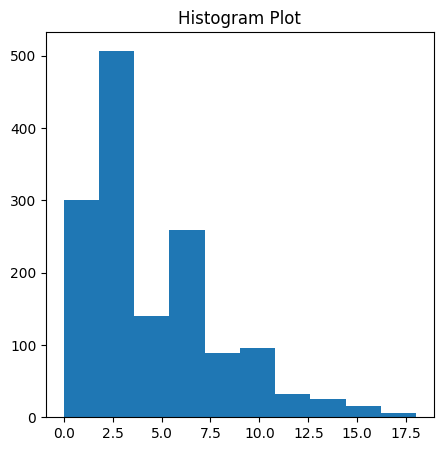

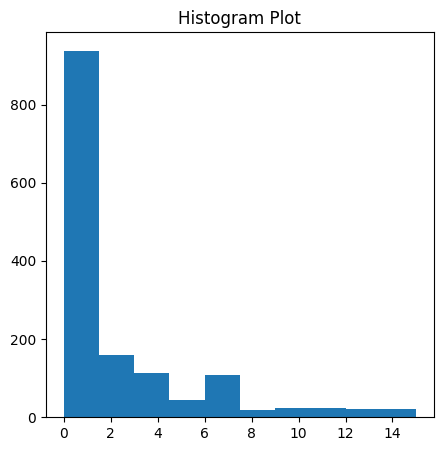

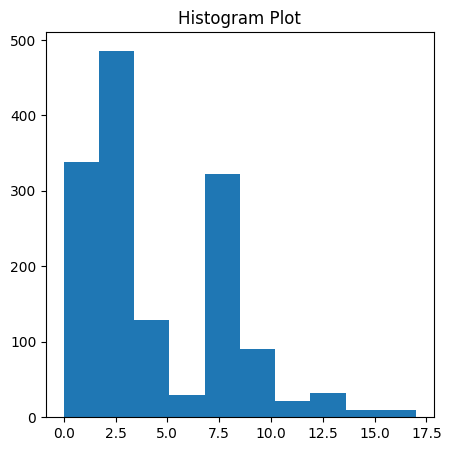

KeyError: ignored

In [28]:
# 3.Outliers Treatment

# outliers visualisatuin:

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.graphics.gofplots import qqplot

def Box_plots(df):
  for i in df[numCols].columns:
    plt.figure(figsize=(3,3))
    plt.title("Box Plot")
    sns.boxplot(df[i])
    plt.show()
Box_plots(data)


def hist_plots(df):
  for i in df[numCols].columns:
    plt.figure(figsize=(5, 5))
    plt.hist(df[i])
    plt.title("Histogram Plot")
    plt.show()
hist_plots(data)


def scatter_plots(df1,df2):
  for i in df1[numCols].columns:
    fig, ax = plt.subplots(figsize=(5,5))
    ax.scatter(df1[i],df2)
    ax.set_xlabel(i)
    ax.set_ylabel('Churn')
    plt.title("Scatter Plot")
    plt.show()
scatter_plots(data[numCols],data['Churn'])

def dist_plots(df):
  for i in df[numCols].columns:
    plt.figure(figsize=(5, 5))
    sns.distplot(df)
    plt.title("Distribution plot")
    sns.despine()
    plt.show()
dist_plots(data[numCols])

def qq_plots(df):
    plt.figure(figsize=(5, 5))
    qqplot(df,line='s')
    plt.title("Normal QQPlot")
    plt.show()
qq_plots(data[numCols])

In [29]:
# tracing outliers

import pandas as pd
import numpy as np


out={}
def iqr_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1
    lower_tail = q1 - 1.5 * iqr
    upper_tail = q3 + 1.5 * iqr

    for col in df.columns:
        outliers = df[(df[col] > upper_tail[col]) | (df[col] < lower_tail[col])]
        #  out.extend(outliers[col].tolist())
        out[col] = outliers[col].tolist()

    print("Outliers:", out)

iqr_outliers(data[numCols])


Outliers: {'Age': [], 'DailyRate': [], 'DistanceFromHome': [], 'Education': [], 'EmployeeCount': [], 'EmployeeNumber': [], 'EnvironmentSatisfaction': [], 'HourlyRate': [], 'JobInvolvement': [], 'JobLevel': [], 'JobSatisfaction': [], 'MonthlyIncome': [19094, 18947, 19545, 18740, 18844, 18172, 17328, 16959, 19537, 17181, 19926, 19033, 18722, 19999, 16792, 19232, 19517, 19068, 19202, 19436, 16872, 19045, 19144, 17584, 18665, 17068, 19272, 18300, 16659, 19406, 19197, 19566, 18041, 17046, 17861, 16835, 16595, 19502, 18200, 16627, 19513, 19141, 19189, 16856, 19859, 18430, 17639, 16752, 19246, 17159, 17924, 17099, 17444, 17399, 19419, 18303, 19973, 19845, 17650, 19237, 19627, 16756, 17665, 16885, 17465, 19626, 19943, 18606, 17048, 17856, 19081, 17779, 19740, 18711, 18265, 18213, 18824, 18789, 19847, 19190, 18061, 17123, 16880, 17861, 19187, 19717, 16799, 17328, 19701, 17169, 16598, 17007, 16606, 19586, 19331, 19613, 17567, 19049, 19658, 17426, 17603, 16704, 19833, 19038, 19328, 19392, 19665, 

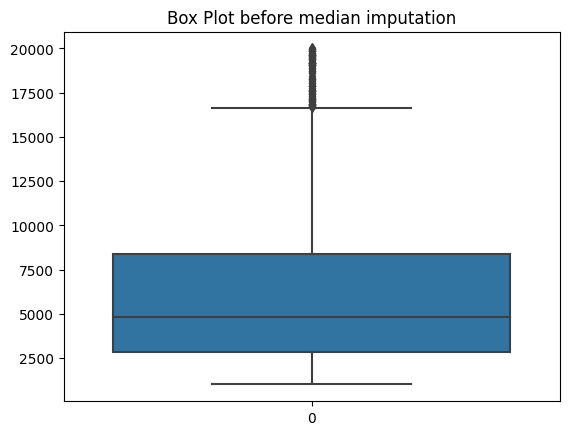

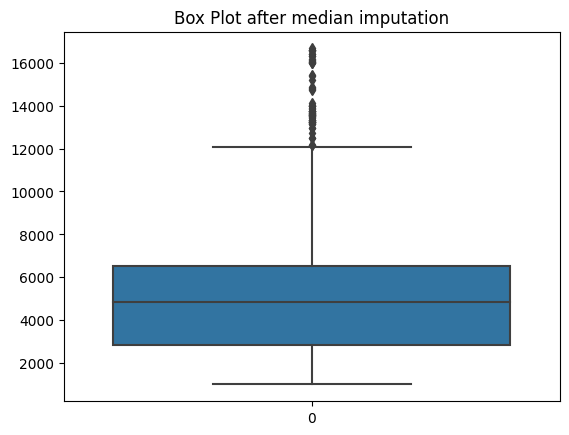

In [30]:
# outliers treatment
# median imputation
import pandas as pd
import numpy as np

sns.boxplot(X_train['MonthlyIncome'])
plt.title("Box Plot before median imputation")
plt.show()
q1 =X_train['MonthlyIncome'].quantile(0.25)
q3 = X_train['MonthlyIncome'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(X_train['MonthlyIncome'])
for i in X_train['MonthlyIncome']:
    if i > Upper_tail or i < Lower_tail:
            X_train['MonthlyIncome'] = X_train['MonthlyIncome'].replace(i, med)
sns.boxplot(X_train['MonthlyIncome'])
plt.title("Box Plot after median imputation")
plt.show()

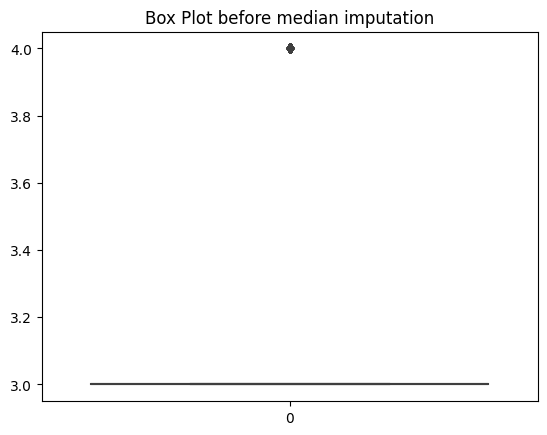

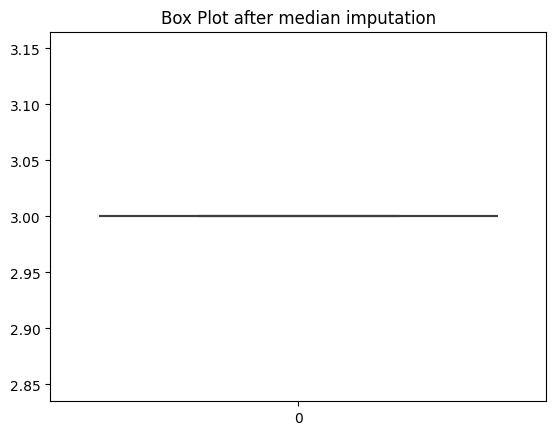

In [32]:
# outliers treatment
# median imputation
import pandas as pd
import numpy as np

sns.boxplot(X_train['PerformanceRating'])
plt.title("Box Plot before median imputation")
plt.show()
q1 =X_train['PerformanceRating'].quantile(0.25)
q3 = X_train['PerformanceRating'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(X_train['PerformanceRating'])
for i in X_train['PerformanceRating']:
    if i > Upper_tail or i < Lower_tail:
            X_train['PerformanceRating'] = X_train['PerformanceRating'].replace(i, med)
sns.boxplot(X_train['PerformanceRating'])
plt.title("Box Plot after median imputation")
plt.show()

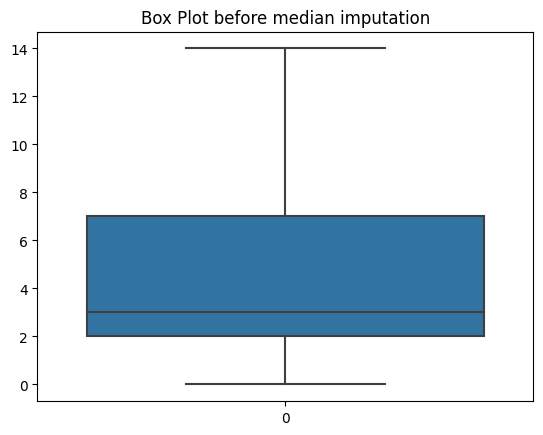

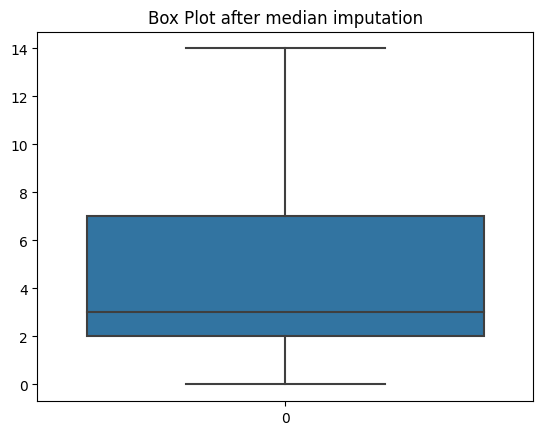

In [34]:
# outliers treatment
# median imputation
import pandas as pd
import numpy as np

sns.boxplot(X_train['YearsWithCurrManager'])
plt.title("Box Plot before median imputation")
plt.show()
q1 =X_train['YearsWithCurrManager'].quantile(0.25)
q3 = X_train['YearsWithCurrManager'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(X_train['YearsWithCurrManager'])
for i in X_train['YearsWithCurrManager']:
    if i > Upper_tail or i < Lower_tail:
            X_train['YearsWithCurrManager'] = X_train['YearsWithCurrManager'].replace(i, med)
sns.boxplot(X_train['YearsWithCurrManager'])
plt.title("Box Plot after median imputation")
plt.show()

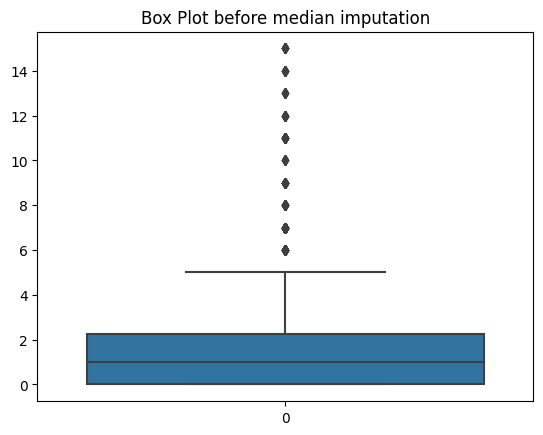

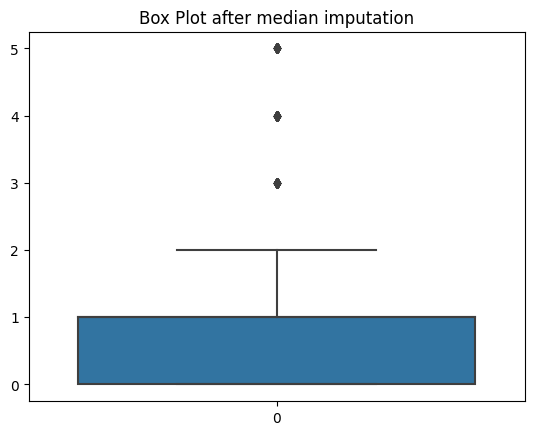

In [35]:


# outliers treatment
# median imputation
import pandas as pd
import numpy as np

sns.boxplot(X_train['YearsSinceLastPromotion'])
plt.title("Box Plot before median imputation")
plt.show()
q1 =X_train['YearsSinceLastPromotion'].quantile(0.25)
q3 = X_train['YearsSinceLastPromotion'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(X_train['YearsSinceLastPromotion'])
for i in X_train['YearsSinceLastPromotion']:
    if i > Upper_tail or i < Lower_tail:
            X_train['YearsSinceLastPromotion'] = X_train['YearsSinceLastPromotion'].replace(i, med)
sns.boxplot(X_train['YearsSinceLastPromotion'])
plt.title("Box Plot after median imputation")
plt.show()

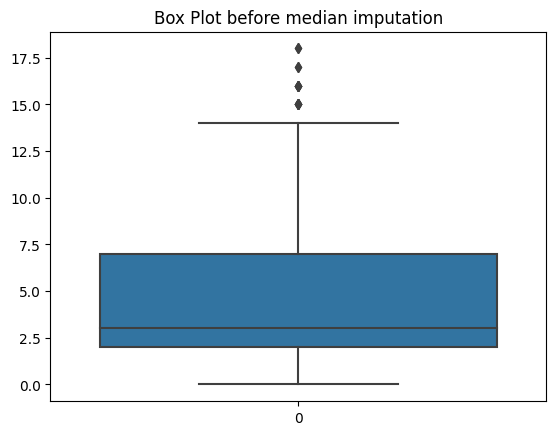

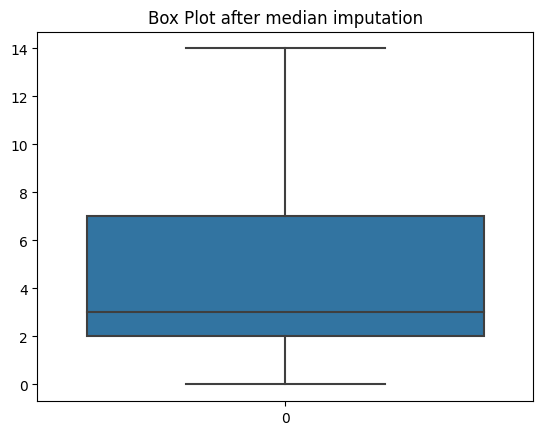

In [36]:


# outliers treatment
# median imputation
import pandas as pd
import numpy as np

sns.boxplot(X_train['YearsInCurrentRole'])
plt.title("Box Plot before median imputation")
plt.show()
q1 =X_train['YearsInCurrentRole'].quantile(0.25)
q3 = X_train['YearsInCurrentRole'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(X_train['YearsInCurrentRole'])
for i in X_train['YearsInCurrentRole']:
    if i > Upper_tail or i < Lower_tail:
            X_train['YearsInCurrentRole'] = X_train['YearsInCurrentRole'].replace(i, med)
sns.boxplot(X_train['YearsInCurrentRole'])
plt.title("Box Plot after median imputation")
plt.show()


In [38]:
# ->6.Encoding categorical variables
cat_vars = [var for var in X_train.columns if X_train[var].dtype == 'O']
def replace_categories(train,test,var,target):

  ordered_labels = train.groupby([var])[target].mean().sort_values().index

  ordinal_label ={k:i for i,k in enumerate(ordered_labels,0)}

  train[var] = train[var].map(ordinal_label)
  test[var] = test[var].map(ordinal_label)

for var in cat_vars:
  replace_categories(X_train, X_test, var, 'Attrition')

print(X_train.shape,X_test.shape)
print(X_train.head())

(1176, 35) (294, 35)
      Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
1374   58          0               1        605           1                21   
1092   45          0               1        950           0                28   
768    40          0               1        300           1                26   
569    36          0               0       1434           1                 8   
911    25          1               2        599           1                24   

      Education  EducationField  EmployeeCount  EmployeeNumber  ...  \
1374          3               1              1            1938  ...   
1092          3               4              1            1546  ...   
768           3               3              1            1066  ...   
569           4               1              1             789  ...   
911           1               1              1            1273  ...   

      RelationshipSatisfaction  StandardHours  StockOptionLevel  

In [39]:
# 7 Feature engineering , feature scaling

# ->7 Feature engineering , feature scaling
train_vars = [var for var in X_train.columns if var not in ['Attrition']]
print(train_vars,len(train_vars))

# import the scale
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

scaler.fit(X_train[train_vars])

# transform the train and test set
X_train[train_vars] = scaler.transform(X_train[train_vars])

X_test[train_vars] = scaler.transform(X_test[train_vars])

['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'] 34


In [40]:
# 4.Feature Selection
# for feature selection ,we will choose Lasso regression as it has the capability to shrink some of the coefficients to 0 .

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
print(X_train.head())


           Age  Attrition  BusinessTravel  DailyRate  Department  \
1374  1.795918          0             0.0  -0.287044         1.0   
1092  0.734694          0             0.0   0.206872         0.0   
768   0.326531          0             0.0  -0.723694         1.0   
569   0.000000          0            -1.0   0.899785         1.0   
911  -0.897959          1             1.0  -0.295634         1.0   

      DistanceFromHome  Education  EducationField  EmployeeCount  \
1374          1.166667        0.0             0.0            0.0   
1092          1.750000        0.0             1.5            0.0   
768           1.583333        0.0             1.0            0.0   
569           0.083333        0.5             0.0            0.0   
911           1.416667       -1.0             0.0            0.0   

      EmployeeNumber  ...  RelationshipSatisfaction  StandardHours  \
1374        0.858495  ...                       0.0            0.0   
1092        0.487459  ...                 

In [41]:
y_train = X_train['Attrition']
y_test = X_test['Attrition']

# drop unnecessary variables from our training and testing sets
X_train.drop(['Attrition'], axis=1, inplace=True)
X_test.drop(['Attrition'], axis=1, inplace=True)

# remember to set the seed, the random state in this function
sel_ = SelectFromModel(Lasso(alpha=0.005, random_state=0))

# train Lasso model and select features
sel_.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [42]:
sel_.get_support()

array([ True,  True,  True, False,  True, False,  True, False, False,
        True,  True, False,  True, False,  True,  True,  True,  True,
       False,  True, False,  True,  True, False,  True, False,  True,
       False,  True,  True,  True,  True,  True,  True])

In [43]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feats = X_train.columns[(sel_.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feats)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

total features: 34
selected features: 23
features with coefficients shrank to zero: 11


In [44]:
# print the selected features
selected_feats

Index(['Age', 'BusinessTravel', 'DailyRate', 'DistanceFromHome',
       'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [45]:
# model building

from sklearn import model_selection
from numpy import abs
# from sklearn.metrics import mean_squared_error,mean_absolute_error
# from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

models = []
names = []

models.append(('Logistic Regression',LogisticRegression()))
models.append(('Linear svc',LinearSVC()))
models.append(('Random forest classifier',RandomForestClassifier()))
models.append(('knn ',KNeighborsClassifier()))
models.append(('Guassian NB ',GaussianNB()))
models.append(('Decision TreeClassifier',DecisionTreeClassifier()))
models.append(('XGBClassifier',XGBClassifier()))

for name,model in models:
  cv_score = model_selection.cross_val_score(model,X_train,y_train,cv = 20,scoring='accuracy')
  cv_score = np.sqrt(np.abs(cv_score))


  print("name:--->>",name)
  print("----------------------------------")
  print("CV mean Score :{0},CV min:{1},CV std :{2}".format(np.mean(cv_score),np.min(cv_score),np.std(cv_score)))
  print("----------------------------------")

name:--->> Logistic Regression
----------------------------------
CV mean Score :0.9388910615165088,CV min:0.9019752336033946,CV std :0.017101412168283037
----------------------------------
name:--->> Linear svc
----------------------------------
CV mean Score :0.9365964685356483,CV min:0.8925302064868872,CV std :0.01815015173238547
----------------------------------
name:--->> Random forest classifier
----------------------------------
CV mean Score :0.9276110109088943,CV min:0.9113223768657671,CV std :0.008519825465809098
----------------------------------
name:--->> knn 
----------------------------------
CV mean Score :0.9202235406755397,CV min:0.9001915504970077,CV std :0.010966044084714521
----------------------------------
name:--->> Guassian NB 
----------------------------------
CV mean Score :0.8943694064017491,CV min:0.8336157713463008,CV std :0.03176897658559569
----------------------------------
name:--->> Decision TreeClassifier
----------------------------------
CV mean 

In [46]:
def best_model(model):
    print(model.best_score_)
    print(model.best_params_)
    print(model.best_estimator_)

In [47]:
# selecting a model : Logistic Regression
#
# Fit primal logistic regression
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,0.5,1,10,50,100], 'max_iter': [250], 'fit_intercept':[True],'intercept_scaling':[1],
              'penalty':['l2'], 'tol':[0.00001,0.0001,0.000001]}
log_primal_Grid = GridSearchCV(LogisticRegression(solver='lbfgs'),param_grid, cv=10, refit=True, verbose=0)
log_primal_Grid.fit(X_train.loc[:, X_train.columns != 'Attrition'],y_train)
best_model(log_primal_Grid)

0.8827031725336811
{'C': 10, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 250, 'penalty': 'l2', 'tol': 1e-05}
LogisticRegression(C=10, max_iter=250, tol=1e-05)


In [48]:
# Fit primal logistic regression
log_primal = LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=250, multi_class='auto',n_jobs=None,
                                penalty='l2', random_state=None, solver='lbfgs',tol=1e-05, verbose=0, warm_start=False)
log_primal.fit(X_train.loc[:, X_train.columns != 'Attrition'],y_train)



LogisticRegression(C=10, max_iter=250, tol=1e-05)

In [49]:
from sklearn.metrics import classification_report

In [50]:
Y_pred = log_primal.predict(X_test)

In [51]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       245
           1       0.71      0.35      0.47        49

    accuracy                           0.87       294
   macro avg       0.79      0.66      0.70       294
weighted avg       0.85      0.87      0.85       294

